### Analysis for du Plessis -  High-frequency variations of the mixed layer buoyancy in the Southern Ocean

This notebook is the code used to plot the figures du Plessis et al - JGR Oceans

The code is run in the following order:

#### Load the dependencies

In [1]:
%pylab inline
import xarray as xr
from tqdm import tqdm_notebook
import cmocean.cm as cmo
import pandas as pd
import my_functions as my

plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

font = {'family' : 'Arial',
        'weight' : 'ultralight',
        'size'   : 13}

matplotlib.rc('font', **font)

rc('ytick.major', size=4)
rc('xtick.major', size=4)
rc('ytick.minor', size=4)
rc('xtick.minor', size=4)
rc('lines', linewidth=1.5)

Populating the interactive namespace from numpy and matplotlib


## Figure 1
---

Map of the deployment location, sea ice distribution, sea ice hovmoller

Sea ice data source: http://data.meereisportal.de/data/iup/hdf/s/

### Load the sea ice data

In [2]:
# Load the sea ice concentration dataset that we created and saved
sic = xr.open_dataset('../../data/seaice/sic_interp.nc')

### Plot the hovmoller map of the sea ice

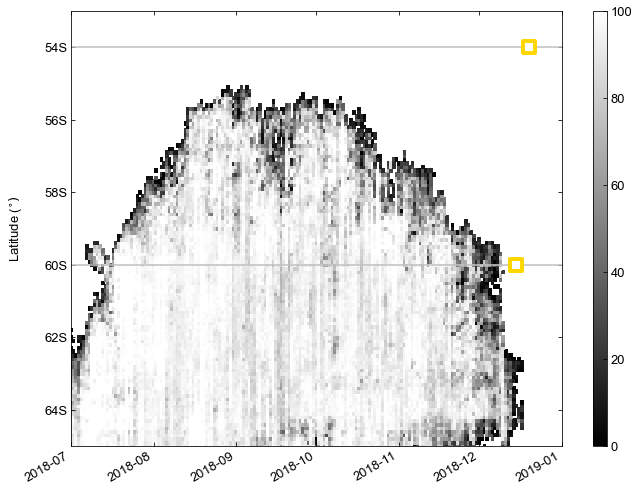

In [3]:
fig,ax=subplots(figsize=[11, 8])

# select data along the GH line, 0E
ds=sic.sic.isel(lon=1800) 

# plot the hovmoller
ds.T.plot(cmap='gray', ax=ax, vmin=0, vmax=100, cbar_kwargs={'label': '', 'aspect': 30})

# # set the plot limits
ax.set_ylim(-65, -53)
ax.set_xlim('2018-07-01', '2019-01-01')

ax.plot(ds.time, np.zeros(len(ds.time))-60, c='0.75', ls='-')
ax.plot(ds.time, np.zeros(len(ds.time))-54, c='0.75', ls='-')

ax.yaxis.set_ticks(np.arange(-64, -52, 2))
ax.yaxis.set_ticklabels(['64S', '62S', '60S', '58S', '56S', '54S'])

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Latitude ($^{\circ})$', labelpad=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

scatter(pd.to_datetime('2018-12-19T16:09:34'), -54, s=150, marker='s', facecolor='w', edgecolor='gold', lw=4, zorder=10)
scatter(pd.to_datetime('2018-12-14T21:56:37'), -60, s=150, marker='s', facecolor='w', edgecolor='gold', lw=4, zorder=10)

# ax.text(-59.5, pd.to_datetime('2018-12-18'), 'Gliders deployed', c='y', fontsize=18, fontweight='bold')

savefig('../../figures/seaice_hov.png', dpi=300, bbox_inches='tight')

#### Load ADT data for frontal locations

In [4]:
adt = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/adt/nrt*.nc')

# adjust the longitudes from (0, 360) to (-180, 180)
adt = my.adjust_lon_xr_dataset(adt, lon_name='longitude')

# get the mean adt for the deployment
adt_mean = adt.mean(dim='time')
adt_mean['gos'] = (('latitude', 'longitude'), np.sqrt(adt_mean.ugos**2 + adt_mean.vgos**2))

# calculate eke
u_mean = adt.ugos.mean(dim='time')
v_mean = adt.vgos.mean(dim='time')

u_prime = adt.ugos-u_mean
v_prime = adt.vgos-v_mean

eke = np.sqrt(u_prime**2 + v_prime**2).mean(dim='time')

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/Users/marcel/

### Load bathymetry data from ETOPO

In [5]:
etopo = xr.open_dataset('../../data/ETOPO1_Ice_g_gmt4.grd')
etopo = etopo.sel(x=slice(-30, 30), y=slice(-75, -30))

### Frontal detection 

Using the methods of Swart et al. (2010) An altimetry-based gravest empirical mode south of Africa: 1. Development and validation (Figure 8)

In [6]:
import gsw

dist_adt = gsw.distance(np.zeros(len(adt_mean.latitude)), adt_mean.latitude.values)[0]

adt_diff_lat = adt_mean.latitude[1:].values
adt_diff = 100000 * adt_mean.adt[:,720].diff(dim='latitude').values / dist_adt

### Plot Southern Ocean Fronts

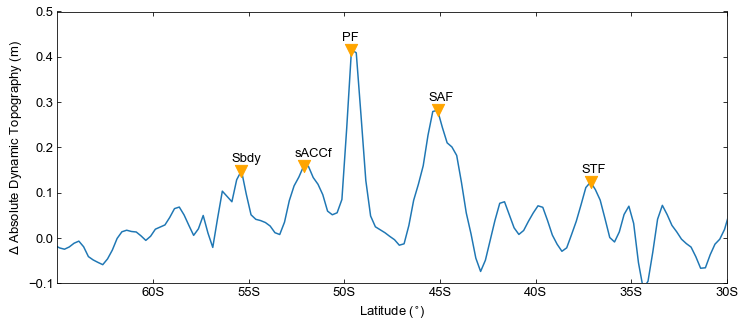

In [7]:
fig,ax=subplots(figsize=[12, 5])

ax.plot(adt_diff_lat, adt_diff)
ax.set_xlim(-65, -30)
ax.set_ylim(-0.1, 0.5)

idx = [137, 150, 160, 178, 210]
fnt = ['Sbdy', 'sACCf', 'PF', 'SAF', 'STF']

for i, val in enumerate(idx):
    
    ax.scatter(adt_diff_lat[val], adt_diff[val], s=150, c='orange', marker='v', zorder=10)
    ax.text(   adt_diff_lat[val] - 0.5,  adt_diff[val] + 0.02, str(fnt[i]))

# plotting 
ax.xaxis.set_ticks([-60, -55, -50, -45, -40, -35, -30])
ax.xaxis.set_ticklabels(['60S','55S','50S','45S','40S','35S','30S'])

ax.set_ylabel('$\Delta$ Absolute Dynamic Topography (m)')
ax.set_xlabel('Latitude ($^{\circ}$)')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

savefig('../../figures/adt_grad_front_detection.png', dpi=300, bbox_inches='tight')

In [8]:
front_contours = adt_mean.adt[:,720][idx].values

### Determine sea ice max contour

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)


(-20.0, 20.0)

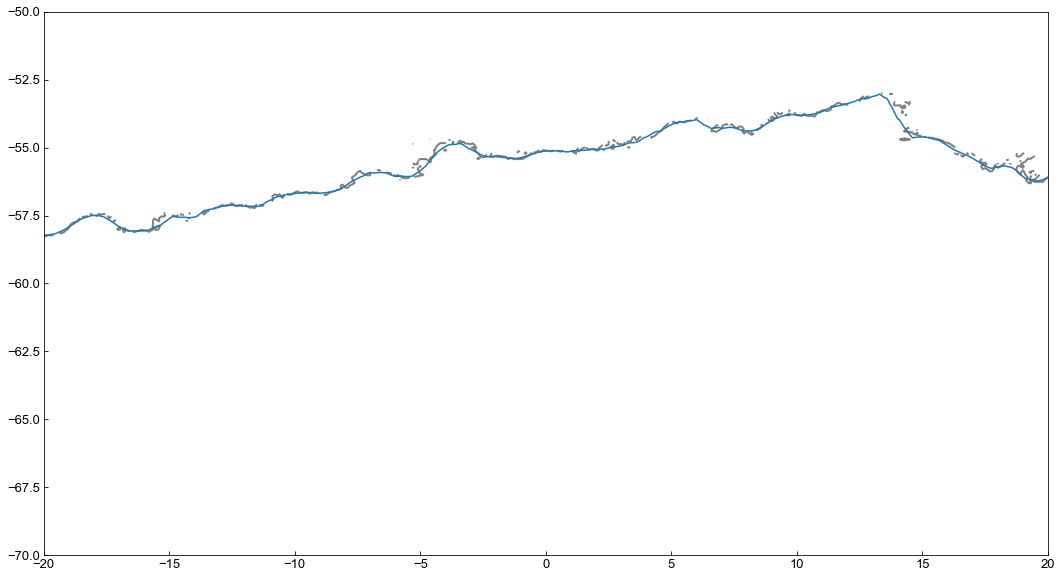

In [9]:
sic_mnth=sic.sic.resample(time='1M').mean()

cs = contour(sic.lon, sic.lat, sic_mnth.sel(time='2018-09-30'), levels=[15], colors='0.5', linewidths=2)

for i in range(len(cs.allsegs[0])):
    
    if i==0:
        lon=cs.allsegs[0][i][:,0]
        lat=cs.allsegs[0][i][:,1]
        
    if i>0:
        lon = np.append(lon, cs.allsegs[0][i][:,0])
        lat = np.append(lat, cs.allsegs[0][i][:,1])

lon = lon[lat>-66]
lat = lat[lat>-66]
        
new_lon = np.arange(-180,180.05,0.1)
        
for i, ln in enumerate(new_lon):
    
    idx = ((lon>ln) & (lon<ln+0.1))
    
    if i==0:
        new_lat = np.median(lat[idx])
    if i>0:
        try:
            new_lat = np.append(new_lat, np.min(lat[idx]))
        except:
            new_lat = np.append(new_lat, np.nan)

import glidertools as gt

new_lat = gt.cleaning.rolling_window(new_lat, func=np.nanmean, window=10)

plot(new_lon, new_lat)

xlim(-20, 20)

### Plot EKE map 

<ipython-input-10-2d2ca5c924ea>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  h_sp = ax.pcolormesh(adt_mean.longitude, adt_mean.latitude, eke, norm=LogNorm(vmin=5e-3, vmax=1e-0), cmap='YlGnBu_r')


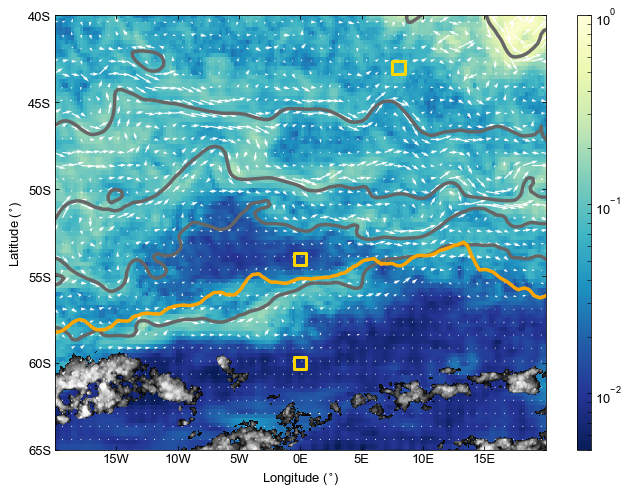

In [10]:
from matplotlib.colors import LogNorm

fig,ax=subplots(figsize=[11,8])

h_sp = ax.pcolormesh(adt_mean.longitude, adt_mean.latitude, eke, norm=LogNorm(vmin=5e-3, vmax=1e-0), cmap='YlGnBu_r')
h_fr = ax.contour( adt_mean.longitude, adt_mean.latitude, adt_mean.adt, levels=front_contours, colors='0.4', linewidths=3.5, linestyles='-')

h_si = ax.plot    (new_lon, new_lat, color='orange', linewidth=3.5)
h_si = ax.contourf(sic.lon, sic.lat, sic.sic.sel(time='2018-12-14'), levels=np.arange(15, 101, 1), cmap='gray')

ax.set_xlim(-20, 20)
ax.set_ylim(-65, -40)

cb=colorbar(mappable=h_sp, aspect=30)
cb.set_ticks([1e-3, 1e-2, 1e-1, 1e0])
ax.scatter([0, 0, 8], [-60, -54, -43], s=150, marker='s', facecolor='none', edgecolor='gold', zorder=100, linewidth=3)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.xaxis.set_ticks([-15, -10, -5, 0, 5, 10, 15])
ax.xaxis.set_ticklabels(['15W','10W','5W','0E','5E','10E','15E'])

ax.yaxis.set_ticks([-65, -60, -55, -50, -45, -40])
ax.yaxis.set_ticklabels(['65S','60S','55S','50S','45S','40S'])

ax.quiver(adt_mean.longitude[::3], adt_mean.latitude[::3], adt_mean.ugos[::3, ::3], adt_mean.vgos[::3, ::3], color='w', scale=1e1)

ax.set_xlabel('Longitude ($^{\circ}$)')
ax.set_ylabel('Latitude ($^{\circ}$)')

savefig('../../figures/fig1_map.png', dpi=300, bbox_inches='tight')

## Figure 2
---

### Atmospheric forcing terms

#### Load the glider data

In [11]:
import glidertools as gt
import xarray as xr
import numpy as np

dat_saz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg542_saz_L2.nc')
dat_apz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/slocum_apz_L2.nc')
dat_miz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg643_miz_L2.nc')

interp_res = '6H'
offset     = '3H'
dt=21600

dat_saz_interp = dat_saz.resample(time=interp_res, loffset=offset).mean()
dat_apz_interp = dat_apz.resample(time=interp_res, loffset=offset).mean()
dat_miz_interp = dat_miz.resample(time=interp_res, loffset=offset).mean()

dat_saz_interp=dat_saz_interp.interpolate_na(dim='time')
dat_apz_interp=dat_apz_interp.interpolate_na(dim='time')
dat_miz_interp=dat_miz_interp.interpolate_na(dim='time')

import my_functions as my

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['mld_03'] = (('time'), my.calc_mld(dat.density, dat.depth, den_lim=0.03))

for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:

    xt=[]
    xs=[]
    
    for i, m in enumerate(np.round(dat['mld_03'].astype(int))):
        
        xt += dat.temp.sel(depth=slice(5, m-5)).mean(dim='depth').values[i],
        xs += dat.salt.sel(depth=slice(5, m-5)).mean(dim='depth').values[i],
    
    dat['ml_s'] = (('time'), xs)
    dat['ml_t'] = (('time'), xt)
    
    dat['ml_s_smooth'] = (('time'), gt.cleaning.rolling_window(dat['ml_s'], func=np.nanmean, window=4))
    dat['ml_t_smooth'] = (('time'), gt.cleaning.rolling_window(dat['ml_t'], func=np.nanmean, window=4))

In [12]:
lightblue = '#5499c7'
blue      = '#21618c'
orange    = '#f39c12'
green     = '#27ae60'
red       = '#cb4335' 

In [13]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)

yearsFmt = mdates.DateFormatter("%d.%m")

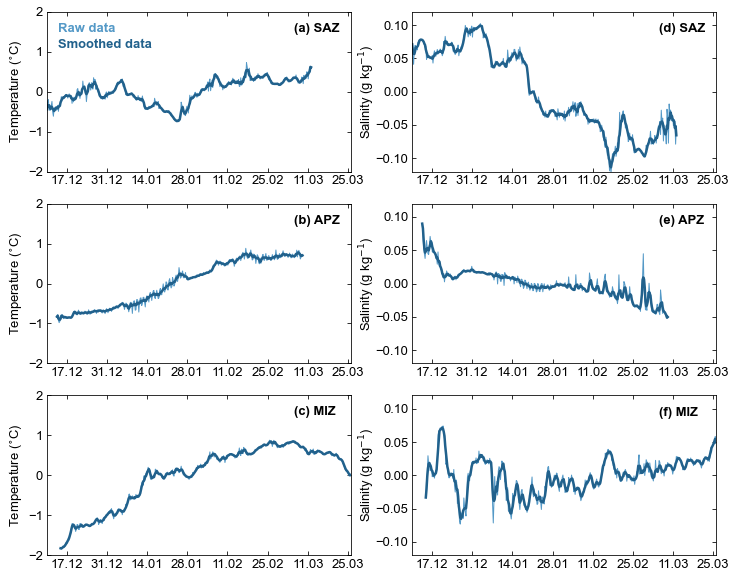

In [14]:
fig,ax=subplots(3,2,figsize=[12, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i,0].plot(dat.time, dat.ml_t        - np.mean(dat.ml_t)       , c=lightblue, lw=1)
    ax[i,0].plot(dat.time, dat.ml_t_smooth - np.mean(dat.ml_t_smooth), c=blue,      lw=2.5)
    
    ax[i,1].plot(dat.time, dat.ml_s        - np.mean(dat.ml_s)       , c=lightblue, lw=1)
    ax[i,1].plot(dat.time, dat.ml_s_smooth - np.mean(dat.ml_s_smooth), c=blue,      lw=2.5)
    
    ax[i,0].set_ylabel('Temperature ($^{\circ}$C)')
    ax[i,1].set_ylabel('Salinity (g kg$^{-1}$)', labelpad=-2)
    
    ax[i,0].set_ylim(-2, 2)
    ax[i,1].set_ylim(-0.12, 0.12)
    
    ax[i,1].yaxis.set_ticks(np.arange(-0.1, 0.15, 0.05))
    
    for j in range(2):
        
#         ax[i,j].grid(ls='-', which='major', axis='both')        
        ax[i,j].set_xlim('2018-12-10', '2019-03-26')

        ax[i,j].xaxis.set_major_locator(week)
        ax[i,j].xaxis.set_major_formatter(yearsFmt)

        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
    
ax[0,0].text('2018-12-14', 1.5, 'Raw data',      c=lightblue, fontweight='bold')
ax[0,0].text('2018-12-14', 1.1, 'Smoothed data', c=blue,      fontweight='bold')

ax[0,0].text('2019-03-06', 1.5, '(a) SAZ', fontweight='bold')
ax[1,0].text('2019-03-06', 1.5, '(b) APZ', fontweight='bold')
ax[2,0].text('2019-03-06', 1.5, '(c) MIZ', fontweight='bold')

ax[0,1].text('2019-03-06', 0.089, '(d) SAZ', fontweight='bold')
ax[1,1].text('2019-03-06', 0.089, '(e) APZ', fontweight='bold')
ax[2,1].text('2019-03-06', 0.089, '(f) MIZ', fontweight='bold')

savefig('../../figures/ml_ts_smooth.png', dpi=300, bbox_inches='tight')

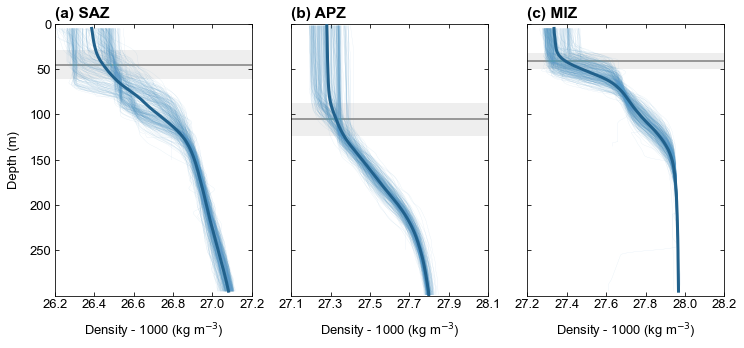

In [15]:
from collections import OrderedDict

fig,ax=subplots(1,3, figsize=[12,5], sharey=True)

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):

    [ax[i].plot(dat.density.isel(time=t)-1000, dat.depth, lw=0.2, c=lightblue, alpha=0.25, label='Glider density') for t in range(len(dat.time))]
    
    ax[i].set_ylim(300, 0)
    ax[i].set_xlabel('Density - 1000 (kg m$^{-3}$)', labelpad=10)
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    ax[i].plot(dat.density.mean(dim='time')-1000, dat.depth, c=blue, lw=3, label='Glider mean density', zorder=10)

    mld_mean = dat.mld_03.mean(dim='time')
    mld_std  = dat.mld_03.std(dim='time')
    
    ax[i].plot([26, 28.6], [mld_mean, mld_mean], c='0.6', lw=2, ls='-', label='MLD', zorder=1)
    ax[i].fill_between(x=[26, 28.6], y1=mld_mean-mld_std, y2=mld_mean+mld_std, facecolor='0.75', alpha=0.25, label='MLD $\sigma$', zorder=0)

ax[0].set_xlim(26.2, 27.2)
ax[1].set_xlim(27.1, 28.1)
ax[2].set_xlim(27.2, 28.2)

ax[0].xaxis.set_ticks(np.arange(26.2, 27.4, 0.2))
ax[1].xaxis.set_ticks(np.arange(27.1, 28.3, 0.2))
ax[2].xaxis.set_ticks(np.arange(27.2, 28.4, 0.2))

ax[0].yaxis.set_ticks([250, 200, 150, 100, 50, 0])

ax[0].set_ylabel('Depth (m)', labelpad=10)

ax[0].set_title('(a) SAZ', loc='left', fontweight='bold')
ax[1].set_title('(b) APZ', loc='left', fontweight='bold')
ax[2].set_title('(c) MIZ', loc='left', fontweight='bold')

savefig('../../figures/mld_analysis.png', dpi=300, bbox_inches='tight')

#### Load air-sea fluxes of heat and freshwater

In [16]:
era5 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/ERA5_flux_data/*.nc')
era5 = era5.sel(latitude=slice(-40, -65), longitude=slice(-5, 10))

#### Convert from J m$^{-2}$ to W m$^{-2}$

In [17]:
var_name=['slhf', 'sshf', 'str', 'ssr', 'tp', 'e']
era5=my.convert_era5_to_Wm2(ds=era5, var_name=var_name)

#### Calculate the net surface heat flux and evaporation minus precipitation

In [18]:
era5['emp']  = (('time', 'latitude', 'longitude'), era5['e']-era5['tp'])
era5['qnet'] = (('time', 'latitude', 'longitude'), era5['slhf']+era5['sshf']+era5['str' ]+era5['ssr' ])

#### Interpolate to the glider resolution

In [19]:
era5_interp = era5.resample(time=interp_res, loffset=offset).mean()

#### Co-locate air-sea fluxes to glider location

In [20]:
from tqdm import tqdm

var_name = ['slhf','sshf','str' ,'ssr' ,'tp' ,'e' ,'emp' , 'u10', 'v10', 'qnet']  

for var in tqdm(var_name):
    
    dat_saz_interp[var] = (('time'), my.interp_glider_era5(dat_saz_interp, era5_interp, var=var))
    dat_apz_interp[var] = (('time'), my.interp_glider_era5(dat_apz_interp, era5_interp, var=var))
    dat_miz_interp[var] = (('time'), my.interp_glider_era5(dat_miz_interp, era5_interp, var=var))

100%|██████████| 10/10 [01:22<00:00,  8.26s/it]


#### 24-hr rolling window

In [21]:
# import airsea

# var_name = ['slhf','sshf','str' ,'ssr' ,'tp' ,'e' ,'emp' , 'u10', 'v10', 'qnet']  

# for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
    
#     for var in tqdm(var_name):
    
#         dat[var] = gt.cleaning.rolling_window(dat[var], func=np.nanmean, window=4)

#### Calculate wind stress

In [22]:
import airsea

for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
    
    dat['taux'] = (('time'), airsea.windstress.stress(dat.u10, z=10., drag='largepond'))
    dat['tauy'] = (('time'), airsea.windstress.stress(dat.v10, z=10., drag='largepond'))
    
    dat['tau']    = (('time'), np.sqrt(dat['taux']**2 + dat['tauy']**2))

## Figure 2 - Air-sea forcing terms

In [23]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)

yearsFmt = mdates.DateFormatter("%d.%m")

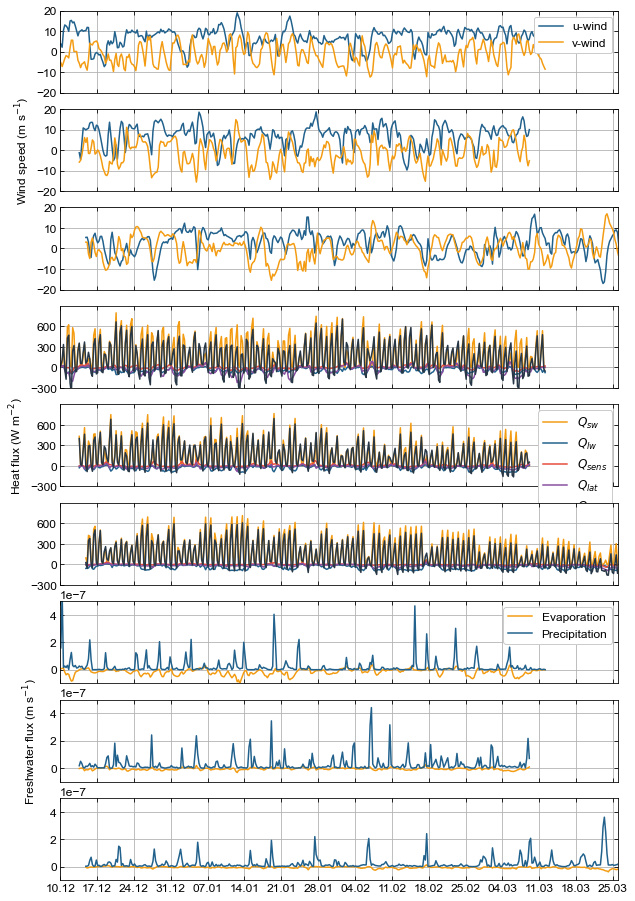

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rc('lines', linewidth=2.5)

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,16))
gs = gridspec.GridSpec(nrows=9,ncols=1)  # sets a grid of 6 rows by 4 column

for r in range(3):       
        
    for c, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):    
            
        if r==0: # winds 
            
            ax = fig.add_subplot(gs[c]) 

            ax.plot(dat.time, dat['u10'], c='#21618c', label='u-wind', lw=1.5)
            ax.plot(dat.time, dat['v10'], c='#f39c12', label='v-wind', lw=1.5)
            
            ax.set_ylim(-20, 20)
            ax.yaxis.set_ticks([-20, -10, 0, 10, 20])            
            
            if c==0:
                ax.legend(framealpha=1, loc=1)
            if c==1:
                ax.set_ylabel('Wind speed (m s$^{-1}$)')
            
        if r==1:
            
            ax = fig.add_subplot(gs[3+c]) 
            
            ax.plot(dat.time, dat['ssr'],  lw=1.5, label='$Q_{sw}$'  , c='#f39c12')
            ax.plot(dat.time, dat['str'],  lw=1.5, label='$Q_{lw}$'  , c='#21618c')
            ax.plot(dat.time, dat['sshf'], lw=1.5, label='$Q_{sens}$', c='#e74c3c')
            ax.plot(dat.time, dat['slhf'], lw=1.5, label='$Q_{lat}$' , c='#884ea0')
            ax.plot(dat.time, dat['qnet'], lw=1.5, label='$Q_{net}$',  c='#273746')
            
            ax.set_ylim(-300, 900)
            ax.yaxis.set_ticks(np.arange(-300, 900, 300))
            
            if c==1:
                ax.legend(framealpha=1, loc=0)
                ax.set_ylabel('Heat flux (W m$^{-2}$)')
                        
        if r==2:            
            
            ax = fig.add_subplot(gs[6+c])
            
            ax.plot(dat.time, dat['e'],  c='#f39c12', label='Evaporation', lw=1.5)
            ax.plot(dat.time, dat['tp'], c='#21618c', label='Precipitation', lw=1.5) 
            
            ax.set_ylim(-1e-7, 5e-7)            
            
            if c==0:
                ax.legend(framealpha=1, loc=0)
            if c==1:
                ax.set_ylabel('Freshwater flux (m s$^{-1}$)', labelpad=10)
            
        ax.grid(ls='-', which='major', axis='both')        
        ax.set_xlim('2018-12-10', '2019-03-26')
                        
        ax.xaxis.set_major_locator(week)
        ax.xaxis.set_major_formatter(yearsFmt)
            
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        
        ax.xaxis.set_ticklabels([])
        
    if r==2:            
        ax.xaxis.set_major_locator(week)
        ax.xaxis.set_major_formatter(yearsFmt)
    
    
    
savefig('../../figures/forcing_terms.png', dpi=300, bbox_inches='tight')

#### Inertial periods

In [25]:
print(((2*math.pi)/gsw.f(-43.5))/60/60)
print(((2*math.pi)/gsw.f(-54))/60/60)
print(((2*math.pi)/gsw.f(-60))/60/60)

-17.38527878244804
-14.792317445513763
-13.818574082600925


## Figure 3
---

Lateral temperature and salinity gradients from the TSG

### Load the TSG data

In [26]:
import pandas as pd

tsg = pd.read_excel('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/agulhas_tsg/Agu035_odv.xlsx')

date = pd.to_datetime(tsg.Date+' '+tsg.Time)

tsg = tsg.drop(columns=['Date', 'Time', 'Unnamed: 12', 'Type', 'Cruise'])

tsg['date'] = date

tsg = tsg.set_index(['date'])

tsg = tsg.to_xarray()
i_nat = ~np.isnat(tsg.date) 
tsg = tsg.sel(date=slice(tsg.date[i_nat][0], tsg.date[i_nat][-1]))

tsg.attrs['cruise'] = 'Agu032'
tsg.attrs['ship']   = 'S.A. Agulhas II'
tsg.attrs['owner']  = 'Department of Environmental Affairs, South Africa'
tsg.attrs['instrument']   = 'Thermosalinograph'
tsg.attrs['contact']= 'Marcel van den Berg, marcel@oceanafrica.com'
tsg.attrs['processing'] = 'Level 1 by DEA'
tsg.attrs['time_coverage_start'] = str(tsg.date[0].values)
tsg.attrs['time_coverage_end']   = str(tsg.date[-1].values)

In [27]:
tsg.attrs['time_coverage_start'] = '2018-11-30T13:31:07'
tsg.attrs['time_coverage_end']   = '2019-01-05T03:02:09'

### Clean the TSG data

In [28]:
import glidertools as gt

tsg = tsg.sel(date=slice(tsg.date[0], tsg.date[150000]))

s = gt.cleaning.rolling_window(tsg.s, func=np.median, window=100)
s = gt.cleaning.rolling_window(s, func=np.mean, window=100)

t = gt.cleaning.rolling_window(tsg.t2, func=np.median, window=100)
t = gt.cleaning.rolling_window(t, func=np.mean, window=100)

tsg['t_clean'] = (('date'), t)
tsg['s_clean'] = (('date'), s)

### Load the EN4.2.1 dataset

In [29]:
# Load the data
EN4 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/EN4.2.1/OI_L09_1989_2020/*.nc')

EN4 = EN4.sel(depth=EN4.depth[0].values)
EN4 = my.adjust_lon_xr_dataset(EN4, lon_name='lon')

# select the months between  
idx = ((EN4.time.dt.month > 11) | (EN4.time.dt.month < 4))
EN4 = EN4.isel(time=idx)

# find the nearest EN4 coordinates to the tsg cooridnates
new_lon = [EN4.lon.values[np.nanargmin(np.abs(EN4.lon - val))] for i, val in enumerate(tsg.Longitude[::500])]
new_lat = [EN4.lat.values[np.nanargmin(np.abs(EN4.lat - val))] for i, val in enumerate(tsg.Latitude[::500])]

new_lon = np.array(new_lon)
new_lat = np.array(new_lat)

lat, ind = np.unique(new_lat, return_index=True)
lon = [new_lon[new_lat==val][0] for i, val in enumerate(lat)]

# convert from kelvin to degC
EN4['temperature'] = EN4['temperature']-273.15

# select data along the GH Line
t_en4=[EN4.temperature.sel(lon=lon[i], lat=lat[i]).values for i in range(len(lon))]
s_en4=[EN4.salinity.sel(lon=lon[i], lat=lat[i]).values for i in range(len(lon))]

t_en4=np.array(t_en4).squeeze()
s_en4=np.array(s_en4).squeeze()

### Load the Sailbuoy data

In [30]:
import datetime

def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    return datetime.datetime.fromordinal(int(datenum)) \
           + datetime.timedelta(days=days) \
           - datetime.timedelta(days=366)

In [31]:
import scipy.io

SB_mat = scipy.io.loadmat('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sailbuoy/marcel_SB_transects.mat')
sb_date = [datenum_to_datetime(d.squeeze()) for d in SB_mat['date'].squeeze()]

sb_data = xr.Dataset(
                 data_vars={'lat' : (('time'), SB_mat['lat'].squeeze()),
                            'lon' : (('time'), SB_mat['lon'].squeeze()),
                            's_ml' : (('time'), SB_mat['salt_filt_movm'].squeeze()),
                            't_ml' : (('time'), SB_mat['temp_filt_movm'].squeeze())},
                 coords={'time': sb_date})

Creating a function which sorts the salinity or temperature into latitudinal bins. This is done as the Sailbuoy often backs on itself and so you can get a clump of data in one spot.

In [32]:
def filter_grad(data, transect_ind, which='s_ml', func=np.nanmin, lat_min=-61, lat_max=-59, lat_int=0.05):
    
    lat_bins = np.arange(lat_min, lat_max, lat_int)
    s_val    = np.ndarray([len(lat_bins), len(transect_ind)-1])
    date_transect = np.ndarray([len(transect_ind)-1])
    
    for i in range(len(transect_ind)-1):
        
        lat_transect     = data.lat[transect_ind[i]:transect_ind[i+1]]
        date_transect[i] = data.time.values[transect_ind[i]]
            
        
        for l, val in enumerate(lat_bins):
            
            ii = ((lat_transect>val) & (lat_transect<val+lat_int))
            
            try:
                s_val[l, i] = func(data[which][ind[i]:ind[i+1]][ii])
            except:
                s_val[l, i] = np.NaN
            
    return s_val, lat_bins, date_transect

Run the filter through the data, with the output of:

    - A gridded salinity products with x, y of latitudinal bins and salinity

In [33]:
ind = [200, 700, 1300, 2500, 3200, 3640, 3920, 4400, 4930, 5500, 5750, 6100, 6680, 7100, 7980, 8430, 8730, 9250, 9650]

sb_s_grid, lat_bins, date_transect = filter_grad(sb_data, ind)
date_transect = sb_data.time[ind[:-1]]

sb_t_grid, lat_bins, date_transect = filter_grad(sb_data, ind, which='t_ml')
date_transect = sb_data.time[ind[:-1]]

Mean and std of the Sailbuoy data

In [34]:
sb_s_mean = np.nanmean(sb_s_grid, axis=1)
sb_s_std  = np.nanstd(sb_s_grid, axis=1)

sb_t_mean = np.nanmean(sb_t_grid, axis=1)
sb_t_std  = np.nanstd(sb_t_grid, axis=1)

sb_s_anom = sb_s_mean - np.nanmean(sb_s_mean)
sb_t_anom = sb_t_mean - np.nanmean(sb_t_mean)

## Plot Figure 3 
---

Plot the TSG transect with the sailbuoy, EN4 and slopes of the gradients

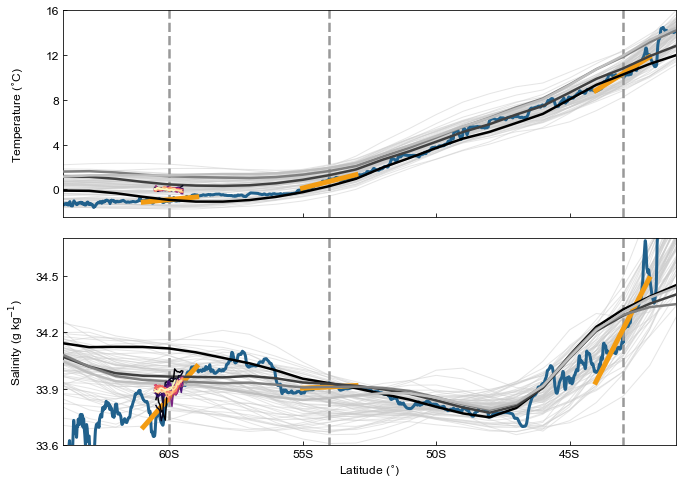

In [35]:
from sklearn.linear_model import LinearRegression
import gsw
from collections import OrderedDict

fig,ax=plt.subplots(2, figsize=[11, 8], sharex=True)
fig.subplots_adjust(hspace=0.1)

en4_props = dict(c='0.8', lw=1, alpha=0.5, zorder=1)
tsg_props = dict(c=blue, zorder=2, lw=3)

for t, val in enumerate(EN4.time):
    
    ax[0].plot(lat, t_en4[:,t], **en4_props)
    ax[1].plot(lat, s_en4[:,t], **en4_props)
    
# ax[0].plot(lat, np.mean(t_en4, axis=1), c='0.5', zorder=1, lw=3.5, label='EN4.2.1')
# ax[1].plot(lat, np.mean(s_en4, axis=1), c='0.5', zorder=1, lw=3.5, label='EN4.2.1')

ax[0].plot(tsg.Latitude, tsg.t_clean, **tsg_props, label='Ship TSG')
ax[1].plot(tsg.Latitude, tsg.s_clean, **tsg_props, label='Ship TSG')

################
# EN4 ROAMMIZ
################

EN4_roammiz = EN4.sel(time=slice('2018-12-01', '2019-03-31'))

for t, val in enumerate(EN4_roammiz.time):
    
    ax[0].plot(EN4_roammiz.lat, EN4_roammiz.temperature.sel(lon=0.)[t], lw=2.5, c=str(t/4), zorder=5)
    ax[1].plot(EN4_roammiz.lat, EN4_roammiz.salinity.sel(lon=0.)[t]   , lw=2.5, c=str(t/4), zorder=5)

for a in ax:
    a.set_xlim(-64, -41)
    
    a.plot([-43, -43], [-2.5, 36], c='0.6', ls='--')
    a.plot([-54, -54], [-2.5, 36], c='0.6', ls='--')
    a.plot([-60, -60], [-2.5, 36], c='0.6', ls='--')  
    

########################
# linear regression to find the slope (gradient) for each glider location
########################

for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
  
    idx = ((tsg.Latitude > dat.lat.mean(dim='time').values-1) & (tsg.Latitude < dat.lat.mean(dim='time').values+1))

    X = tsg.Latitude.values[idx]
    T = tsg.t_clean.values[idx]
    S = tsg.s_clean.values[idx]
  
    i_good=~np.isnan(T) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
  
    i_good=~np.isnan(S) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
  
    X = X.reshape(-1, 1)
    T = T.reshape(-1, 1)
    S = S.reshape(-1, 1)
  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, T)  # perform linear regression
    T_pred = linear_regressor.predict(X)  # make predictions
  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, S)  # perform linear regression
    S_pred = linear_regressor.predict(X)  # make predictions
  
    ax[0].plot(X, T_pred, c=orange, lw=5)
    ax[1].plot(X, S_pred, c=orange, lw=5)
  
    dat['dT_tsg'] = (T_pred[-1] - T_pred[0]) / gsw.distance([0, 0], [X[-1].squeeze(), X[0].squeeze()]) # temperature gradients in degC / m
    dat['dS_tsg'] = (S_pred[-1] - S_pred[0]) / gsw.distance([0, 0], [X[-1].squeeze(), X[0].squeeze()]) # salinity gradients in psu / m
    
    
    
########################
## SAILBUOY GRADIENTS
########################

evenly_spaced_interval = np.linspace(0, 1, len(date_transect))
colors = [cm.magma(x) for x in evenly_spaced_interval]

for i in range(len(date_transect)):

    Ys = sb_s_grid[:, i]
    Yt = sb_t_grid[:, i]

    ax[0].plot(lat_bins, Yt-np.nanmean(Yt),      color=colors[i], zorder=i+10, lw=1.5, label='SB '+str(date_transect[i].values)[:10])
    ax[1].plot(lat_bins, 33.9+Ys-np.nanmean(Ys), color=colors[i], zorder=i+10, lw=1.5, label='SB '+str(date_transect[i].values)[:10]) 
    
    
    
ax[0].set_ylabel('Temperature ($^{\circ}$C)', labelpad=20)
ax[1].set_ylabel('Salinity (g kg$^{-1}$)', labelpad=10)

# yticks
ax[0].yaxis.set_ticks(np.arange(0, 22, 4))
ax[1].yaxis.set_ticks(np.arange(33.6, 34.7, 0.3))
ax[1].set_xlabel('Latitude ($^{\circ}$)')

ax[0].set_xticks([-60, -55, -50, -45])
ax[0].xaxis.set_ticklabels(['60S', '55S', '50S', '45S'])

ax[0].set_ylim(-2.5, 16)
ax[1].set_ylim(33.6, 34.7)

plt.savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig3_gradients.png', dpi=300, bbox_inches='tight')

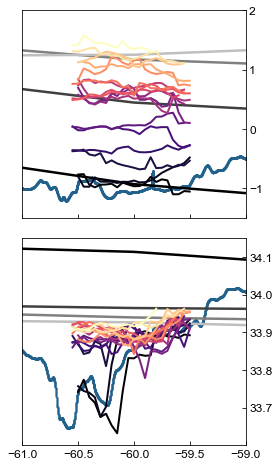

In [36]:
fig,ax=subplots(2,figsize=[4,8], sharex=True)
fig.subplots_adjust(hspace=0.1)

evenly_spaced_interval = np.linspace(0, 1, len(date_transect))
colors = [cm.magma(x) for x in evenly_spaced_interval]

for i in range(len(date_transect)):

    Ys = sb_s_grid[:, i]
    Yt = sb_t_grid[:, i]
    
    ax[0].plot(lat_bins, Yt    , color=colors[i], zorder=i+10, lw=2, label='SB '+str(date_transect[i].values)[:10]) 
    ax[1].plot(lat_bins, Ys+0.3, color=colors[i], zorder=i+10, lw=2, label='SB '+str(date_transect[i].values)[:10]) 
    

# dat = dat_miz_interp

# idx = ((tsg.Latitude > dat.lat.mean(dim='time').values-1) & (tsg.Latitude < dat.lat.mean(dim='time').values+1))

# X = tsg.Latitude.values[idx]
# T = tsg.t_clean.values[idx]
# S = tsg.s_clean.values[idx]

# i_good=~np.isnan(T) # find the good data
# X = X[i_good]; T = T[i_good]; S = S[i_good]

# i_good=~np.isnan(S) # find the good data
# X = X[i_good]; T = T[i_good]; S = S[i_good]

# X = X.reshape(-1, 1)
# T = T.reshape(-1, 1)
# S = S.reshape(-1, 1)

# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, T)  # perform linear regression
# T_pred = linear_regressor.predict(X)  # make predictions

# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, S)  # perform linear regression
# S_pred = linear_regressor.predict(X)  # make predictions

# ax[0].plot(X, T_pred, c=orange, lw=4)
# ax[1].plot(X, S_pred, c=orange, lw=4)

###############
#### TSG #####
###############

ax[0].scatter(tsg.Latitude, tsg.t_clean, s=1, label='Ship TSG', color=blue, alpha=0.5)
ax[1].scatter(tsg.Latitude, tsg.s_clean, s=1, label='Ship TSG', color=blue, alpha=0.5)

[a.set_xlim(-61, -59) for a in ax]
ax[0].set_ylim(-1.5,2)
ax[1].set_ylim(33.6, 34.15)


################
# EN4 
################

EN4_roammiz = EN4.sel(time=slice('2018-12-01', '2019-03-31'))

for t, val in enumerate(EN4_roammiz.time):
    
    ax[0].plot(EN4_roammiz.lat, EN4_roammiz.temperature.sel(lon=0.)[t], lw=2.5, c=str(t/4))
    ax[1].plot(EN4_roammiz.lat, EN4_roammiz.salinity.sel(lon=0.)[t]   , lw=2.5, c=str(t/4))
    
ax[0].yaxis.set_ticks([-1, 0, 1, 2])
ax[1].yaxis.set_ticks([33.7, 33.8, 33.9, 34.0, 34.1])

[a.yaxis.tick_right() for a in ax]

# ax[0].set_ylabel('Temperature ($^{\circ}$C)', labelpad=20)
# ax[1].set_ylabel('Salinity (g kg$^{-1}$)', labelpad=10)



plt.savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig3_gradients_miz.png', dpi=300, bbox_inches='tight')

### Correlation statistics between the EN4 dataset and the slope determined from the TSG data

In [37]:
EN4_saz = EN4.sel(time=slice('2018-12-01', '2019-03-31'), lon=8., lat=slice(-44, -42))
EN4_apz = EN4.sel(time=slice('2018-12-01', '2019-03-31'), lon=0., lat=slice(-55, -53))
EN4_miz = EN4.sel(time=slice('2018-12-01', '2019-03-31'), lon=0., lat=slice(-61, -59))

In [38]:
for i, data in enumerate([EN4_saz, EN4_apz, EN4_miz]):
    
    idx = ((tsg.Latitude > data.lat.min().values-0.01) & (tsg.Latitude < data.lat.max().values+0.01))

    X = tsg.Latitude.values[idx]
    T = tsg.t_clean.values[idx]
    S = tsg.s_clean.values[idx]
  
    i_good=~np.isnan(T) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
  
    i_good=~np.isnan(S) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
  
    X = X.reshape(-1, 1)
    T = T.reshape(-1, 1)
    S = S.reshape(-1, 1)
  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, T)  # perform linear regression
    T_pred = linear_regressor.predict(X)  # make predictions
  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, S)  # perform linear regression
    S_pred = linear_regressor.predict(X)  # make predictions
    
    T_int = scipy.interpolate.griddata(X, T_pred, data.lat)
    S_int = scipy.interpolate.griddata(X, S_pred, data.lat)
    
    x = T_int.squeeze()-np.mean(T_int).squeeze()
    
    for t in range(4):
        
        y = data.salinity[t].values-data.salinity[t].mean().values
        print(np.corrcoef(x,y)[0][1])

0.9943954349032349
0.9833663432146329
0.9829644234250379
0.9801290874501587
-0.9995457201327724
-0.9856430678274279
0.9237250856683715
0.9939785092649821
-0.9711539166689992
-0.9790808527861742
-0.9896548226709567
-0.9721717098030113


#### Determine the T and S gradients for the MIZ from the Sailbuoy data

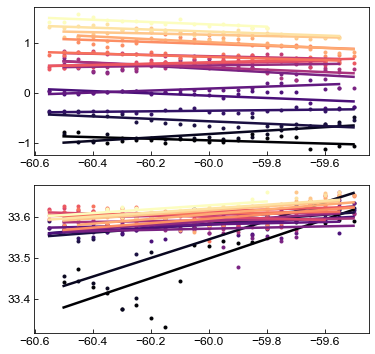

In [39]:
from sklearn.linear_model import LinearRegression

fig,ax=subplots(2,figsize=[6, 6])

plt.rcParams['font.size'] = 14
plt.rc('lines', linewidth=2.5)

dT_grad=[]
dS_grad=[]

for i in range(len(date_transect)):

    X = lat_bins
    S = sb_s_grid[:, i]
    T = sb_t_grid[:, i]
    
    i_good=~np.isnan(T) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
    
    i_good=~np.isnan(S) # find the good data
    X = X[i_good]; T = T[i_good]; S = S[i_good]
    
    X = X.reshape(-1, 1)
    T = T.reshape(-1, 1)
    S = S.reshape(-1, 1)
    
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, T)  # perform linear regression
    T_pred = linear_regressor.predict(X)  # make predictions
    
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, S)  # perform linear regression
    S_pred = linear_regressor.predict(X)  # make predictions
    
    evenly_spaced_interval = np.linspace(0, 1, len(date_transect))
    colors = [cm.magma(x) for x in evenly_spaced_interval]
    
    ax[0].plot(X, T     , color=colors[i], zorder=0, lw=0.0, label='SB '+str(date_transect[i].values)[:10], marker='.') 
    ax[0].plot(X, T_pred, color=colors[i], zorder=10, lw=2.5, label='SB '+str(date_transect[i].values)[:10]) 
    
    ax[1].plot(X, S      , color=colors[i], zorder=0, lw=0.0, label='SB '+str(date_transect[i].values)[:10], marker='.') 
    ax[1].plot(X, S_pred , color=colors[i], zorder=10, lw=2.5, label='SB '+str(date_transect[i].values)[:10])  
    
    dT_grad += (T_pred[-1] - T_pred[0]) / gsw.distance([0, 0], [X[-1].squeeze(), X[0].squeeze()]), # temperature gradients in degC / m
    dS_grad += (S_pred[-1] - S_pred[0]) / gsw.distance([0, 0], [X[-1].squeeze(), X[0].squeeze()]), # salinity gradients in psu / m
    
dat_miz_interp['dT_grad'] = (('time'), scipy.interpolate.griddata(date2num(date_transect), np.array(dT_grad).squeeze(), date2num(dat_miz_interp.time)))
dat_miz_interp['dS_grad'] = (('time'), -scipy.interpolate.griddata(date2num(date_transect), np.array(dS_grad).squeeze(), date2num(dat_miz_interp.time)))

#### Determine the T and S gradients for the SAZ and APZ from the EN4 data

In [40]:
EN4_saz = EN4_roammiz.sel(lon=8., lat=slice(-44, -42))
EN4_apz = EN4_roammiz.sel(lon=0., lat=slice(-55, -53))


dT_grad_saz=[];dS_grad_saz=[];
dT_grad_apz=[];dS_grad_apz=[];

for i in range(4):
    
    dT_grad_saz += (EN4_saz.temperature[i][0]-EN4_saz.temperature[i][-1]).values / gsw.distance([8, 8], [-44, -42]),
    dS_grad_saz += (EN4_saz.salinity   [i][0]-EN4_saz.salinity   [i][-1]).values / gsw.distance([8, 8], [-44, -42]),
    
    dT_grad_apz += (EN4_apz.temperature[i][0]-EN4_apz.temperature[i][-1]).values / gsw.distance([0, 0], [-55, -53]),
    dS_grad_apz += (EN4_apz.salinity   [i][0]-EN4_apz.salinity   [i][-1]).values / gsw.distance([0, 0], [-55, -53]),
    
dS_grad_saz = np.array(dS_grad_saz).squeeze()
dT_grad_saz = np.array(dT_grad_saz).squeeze()
dS_grad_apz = np.array(dS_grad_apz).squeeze()
dT_grad_apz = np.array(dT_grad_apz).squeeze()

In [41]:
dat_saz_interp['dT_grad'] = (('time'), scipy.interpolate.griddata(date2num(EN4_saz.time.values), np.array(dT_grad_saz).squeeze(), date2num(dat_saz_interp.time)))
dat_saz_interp['dS_grad'] = (('time'), scipy.interpolate.griddata(date2num(EN4_saz.time.values), np.array(dS_grad_saz).squeeze(), date2num(dat_saz_interp.time)))

dat_apz_interp['dT_grad'] = (('time'), scipy.interpolate.griddata(date2num(EN4_apz.time.values), np.array(dT_grad_apz).squeeze(), date2num(dat_apz_interp.time)))
dat_apz_interp['dS_grad'] = (('time'), scipy.interpolate.griddata(date2num(EN4_apz.time.values), np.array(dS_grad_apz).squeeze(), date2num(dat_apz_interp.time)))

Fill the nan values

In [42]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['dT_grad'] = dat['dT_grad'].ffill(dim='time').bfill(dim='time')
    dat['dS_grad'] = dat['dS_grad'].ffill(dim='time').bfill(dim='time')

#### Load Bathymetry data

In [43]:
etopo = xr.open_dataset('../../data/ETOPO1_Ice_g_gmt4.grd')

etopo = etopo.sel(x=slice(-20, 20), y=slice(-80, -30))

In [44]:
EN4['density'] = gsw.rho(EN4.salinity.mean(dim='time'), EN4.temperature.mean(dim='time'), p=0)

In [45]:
plt.rcParams["axes.axisbelow"] = False

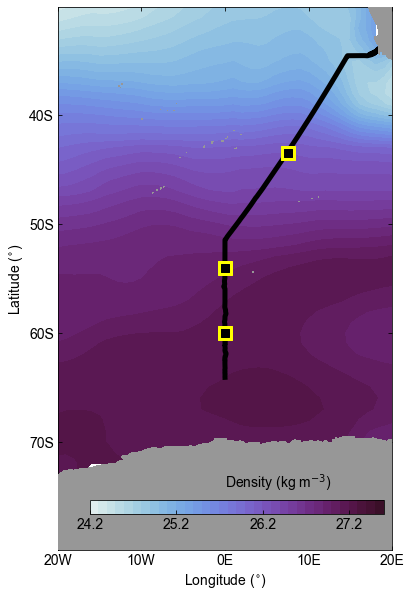

In [46]:
fig,ax=subplots(figsize=[6, 10])

ax.plot(tsg.Longitude, tsg.Latitude, c='k', lw=5)
h=ax.contourf(EN4.lon.sel(lon=slice(-20, 20)), EN4.lat.sel(lat=slice(-80, -30)), EN4.density.sel(lon=slice(-20, 20), lat=slice(-80, -30))-1000,
           cmap=cmo.dense, levels=np.arange(24.2, 27.6, 0.1), zorder=2)


cax = fig.add_axes([0.2, 0.175, 0.68, 0.02])

colorbar(mappable=h, cax=cax, orientation='horizontal', ticks=[24.2, 25.2, 26.2, 27.2])

ax.contourf(etopo.x, etopo.y, etopo.z, levels=[0, 20000], cmap='Greys_r', zorder=3)

ax.set_yticks([-70, -60, -50, -40])
ax.set_xticks([-20, -10, 0, 10, 20])

ax.xaxis.set_ticklabels(['20W', '10W', '0E', '10E', '20E'])
ax.yaxis.set_ticklabels(['70S', '60S', '50S', '40S'])

ax.scatter([7.5, 0, 0], [-43.5, -54, -60], s=200, marker='s', c='yellow', zorder=3)
ax.scatter([7.5, 0, 0], [-43.5, -54, -60], s=50, marker='s', c='k', zorder=4)

ax.text(0, -74.25, 'Density (kg m$^{-3}$)')

# ax.yaxis.tick_right()

ax.set_xlabel('Longitude ($^{\circ}$)')
ax.set_ylabel('Latitude ($^{\circ}$)')

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig3_gradients_map.png', dpi=300, bbox_inches='tight')

## Figure 5
---

Glider temperature and salinity

In [47]:
plt.rcParams['font.size'] = 13
plt.rc('lines', linewidth=2.5)

weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)

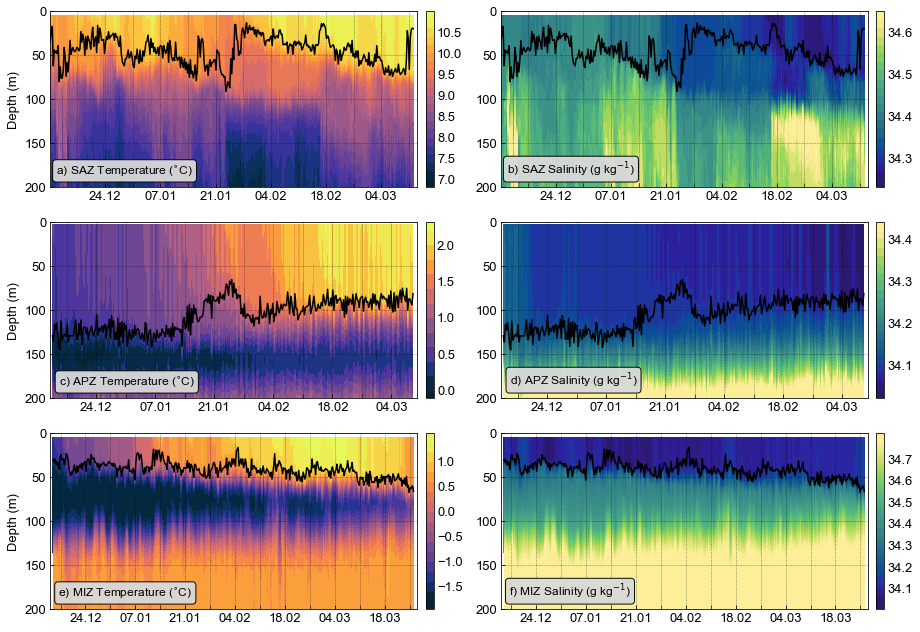

In [48]:
fig, ax = subplots(3, 2, figsize=[16, 11])
fig.subplots_adjust(hspace=0.2, wspace=0.02)

h00=ax[0, 0].contourf(dat_saz_interp.time.values, dat_saz_interp.depth, dat_saz_interp.temp.T, levels=np.arange(7, 10.8, 0.2), cmap=cmo.thermal, extend='both')
h10=ax[1, 0].contourf(dat_apz_interp.time.values, dat_apz_interp.depth, dat_apz_interp.temp.T, levels=np.arange(0, 2.3, 0.2), cmap=cmo.thermal, extend='both')
h20=ax[2, 0].contourf(dat_miz_interp.time.values, dat_miz_interp.depth, dat_miz_interp.temp.T, levels=np.arange(-1.8, 1.6, 0.2), cmap=cmo.thermal, extend='both')
h01=ax[0, 1].contourf(dat_saz_interp.time.values, dat_saz_interp.depth, dat_saz_interp.salt.T, levels=np.arange(34.25, 34.65, 0.02), cmap=cmo.haline, extend='both')
h11=ax[1, 1].contourf(dat_apz_interp.time.values, dat_apz_interp.depth, dat_apz_interp.salt.T, levels=np.arange(34.04, 34.42, 0.02), cmap=cmo.haline, extend='both')
h21=ax[2, 1].contourf(dat_miz_interp.time.values, dat_miz_interp.depth, dat_miz_interp.salt.T, levels=np.arange(34.04, 34.8, 0.02), cmap=cmo.haline, extend='both')

cb00 = colorbar(mappable=h00, ax=ax[0, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb00.ax.tick_params(width=0)
cb10 = colorbar(mappable=h10, ax=ax[1, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb10.ax.tick_params(width=0)
cb20 = colorbar(mappable=h20, ax=ax[2, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb20.ax.tick_params(width=0)
cb01 = colorbar(mappable=h01, ax=ax[0, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb01.ax.tick_params(width=0)
cb11 = colorbar(mappable=h11, ax=ax[1, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb11.ax.tick_params(width=0)
cb21 = colorbar(mappable=h21, ax=ax[2, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb21.ax.tick_params(width=0)
        
#plot mixed layer depths

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    for ii in range(2):
        ax[i, ii].plot(dat.time, dat.mld_03, c='k', lw=1.5)

[a[0].set_ylabel('Depth (m)', labelpad=5) for a in ax]

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

# place a text box in upper left in axes coords
ax[0, 0].text(dat_saz_interp.time.values[6], 190, 'a) SAZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1, 0].text(dat_apz_interp.time.values[6], 190, 'c) APZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2, 0].text(dat_miz_interp.time.values[6], 190, 'e) MIZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)

ax[0, 1].text(dat_saz_interp.time.values[6], 190, 'b) SAZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1, 1].text(dat_apz_interp.time.values[6], 190, 'd) APZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2, 1].text(dat_miz_interp.time.values[6], 190, 'f) MIZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)

for i in range(2):
    ax[0, i].set_xlim('2018-12-10', '2019-03-13')
    ax[1, i].set_xlim('2018-12-13', '2019-03-10')
    ax[2, i].set_xlim('2018-12-14', '2019-03-27')

for a in ax:
    for i in range(2):
        a[i].set_ylim(200, 0)
        a[i].grid(lw=0.5, c='k', ls='--', alpha=0.5, which='both')
        a[i].xaxis.set_major_locator(weeks)
        a[i].xaxis.set_minor_locator(week)
        a[i].xaxis.set_major_formatter(yearsFmt)
        

# savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig5_glider_sections.png', dpi=300, bbox_inches='tight')

## Figure 6
---

Stratification

In [49]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
    
    dat['buoyancy'] = -9.81*(dat['density']-1025)/1025
    dat['N2'] = -dat['buoyancy'].diff(dim='depth')

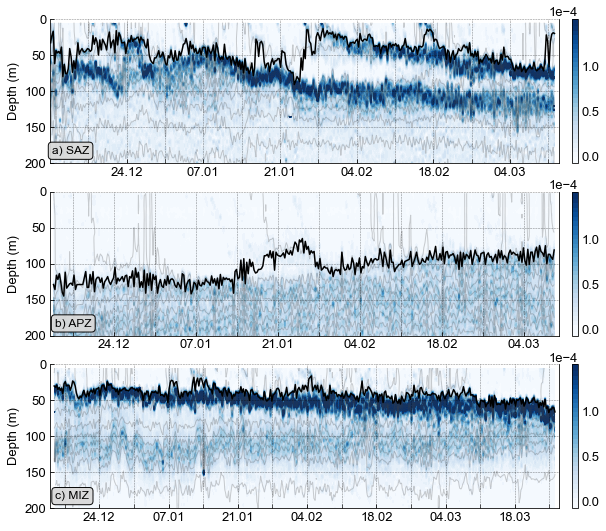

In [50]:
fig, ax = subplots(3, 1, figsize=[11, 9])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    im=ax[i].contourf(dat.time.values, dat.depth, dat.N2.T, levels=np.arange(0, 1.5e-4, 0.5e-5), extend='both', cmap='Blues')
    cb=colorbar(mappable=im, ax=ax[i], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(0, 4e-4, 0.5e-4))
    cb.ax.tick_params(width=0)
    cb.formatter.set_powerlimits((0, 0))
    cb.update_ticks()
    
    ax[i].grid(lw=0.5, c='k', ls='--', alpha=0.5, which='both')
    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].plot(dat.time, dat.mld_03, c='k', lw=1.5)


    ax[i].spines['top'].set_visible(False)
    
    ax[i].contour(dat.time.values, dat.depth, dat.density.T, levels=np.arange(1026, 1029, 0.05), colors='0.25', linewidths=1, alpha=0.25)
    
    ax[i].set_ylim(200, 0)
    ax[i].set_ylabel('Depth (m)', labelpad=5)
    ax[i].set_xlabel('', labelpad=5)
    
ax[0].set_xlim('2018-12-10', '2019-03-13')
ax[1].set_xlim('2018-12-13', '2019-03-10')
ax[2].set_xlim('2018-12-14', '2019-03-27')

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 190, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_apz_interp.time.values[1], 190, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_miz_interp.time.values[1], 190, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)
    
savefig('../../figures/fig6_N2_glider_sections.png', dpi=300, bbox_inches='tight')

## Figure 7
---

Mixed layer budget analysis

#### 1. Air-sea flux impact on surface temperature and salinity

HEAT FLUX

In [51]:
def heatflux(Q, mld, rho=1027, Cp=3850):
    
    return (Q / (rho * Cp * mld))

FRESHWATER FLUX

In [52]:
def freshwaterflux(E, P, mld, S):
    
    return (( (E-P) * S ) / mld)

#### 2. Load the difference flux products

2.1 ERA5

In [53]:
import my_functions as my

era5 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/ERA5_flux_data/*.nc')
era5 = era5.sel(latitude=slice(-40, -65), longitude=slice(-30, 30))

# convert from J m-2 to W m-2
var_name=['slhf', 'sshf', 'str', 'ssr', 'tp', 'e']
era5=my.convert_era5_to_Wm2(ds=era5, var_name=var_name)

# calculate net fluxes and emp
era5['emp']  = (('time', 'latitude', 'longitude'), era5['e']-era5['tp'])
era5['qnet'] = (('time', 'latitude', 'longitude'), era5['slhf']+era5['sshf']+era5['str']+era5['ssr'])

# interp to the resolution of the glider
era5_interp = era5.resample(time=interp_res, loffset=offset).mean()

2.2 JRA-55

In [ ]:
ep_jra55 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/precipitation_evaporation/JRA55/*.nc')
hf_jra55 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/heat_flux/JRA55/*.nc')
ws_jra55 = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/wind_speed/JRA55/*.nc')

# merge the datasets
jra55 = xr.merge([ep_jra55, hf_jra55, ws_jra55])

# correct the longitudes
jra55 = my.adjust_lon_xr_dataset(jra55, lon_name='g4_lon_2')

# Change to consisent naming convention for longitude and latitudes
jra55 = jra55.rename({'g4_lat_1'           : 'latitude',
                      'g4_lon_2'           : 'longitude',
                      'initial_time0_hours': 'time'})

# rename variables
jra55 = jra55.rename({
                      'LHTFL_GDS4_SFC_ave3h': 'slhf',
                      'SHTFL_GDS4_SFC_ave3h': 'sshf',
                      'DSWRF_GDS4_SFC_ave3h': 'dssr',
                      'USWRF_GDS4_SFC_ave3h': 'ussr',
                      'DLWRF_GDS4_SFC_ave3h': 'dstr',
                      'ULWRF_GDS4_SFC_ave3h': 'ustr',
                      'EVP_GDS4_SFC_ave3h'  : 'e',
                      'TPRAT_GDS4_SFC_ave3h': 'tp',
                      'UGRD_GDS4_HTGL'      : 'u10',
                      'VGRD_GDS4_HTGL'      : 'v10',})

jra55 = jra55.sel(latitude=slice(-40, -65), longitude=slice(-30, 30))

jra55['e']  = (('time', 'latitude', 'longitude'), -jra55['e']/(86400*1000))
jra55['tp'] = (('time', 'latitude', 'longitude'),  jra55['tp']/(86400*1000))

jra55['ssr'] = (('time', 'latitude', 'longitude'),  jra55['dssr']-jra55['ussr'])
jra55['str'] = (('time', 'latitude', 'longitude'),  jra55['dstr']-jra55['ustr'])

jra55['sshf'] = (('time', 'latitude', 'longitude'),  -jra55['sshf'])
jra55['slhf'] = (('time', 'latitude', 'longitude'),  -jra55['slhf'])

# calculate net fluxes and emp
jra55['emp']  = (('time', 'latitude', 'longitude'), jra55['e']   -jra55['tp'])
jra55['qnet'] = (('time', 'latitude', 'longitude'), jra55['slhf']+jra55['sshf']+jra55['str']+jra55['ssr'])

# interp to the resolution of the glider
jra55_interp = jra55.resample(time=interp_res, loffset=offset).mean()

2.3 MERRA-2

In [ ]:
ep_merra = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/precipitation_evaporation/MERRA2/*.nc4')
hf_merra = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/heat_flux/MERRA2/*.nc4')
ws_merra = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/wind_speed/MERRA2/*.nc4')

# merge the datasets
merra = xr.merge([ep_merra, hf_merra, ws_merra])
merra = merra.sel(lat=slice(-65, -40), lon=slice(-30, 30))

# correct the longitudes
merra = my.adjust_lon_xr_dataset(merra, lon_name='lon')

# Change to consisent naming convention for longitude and latitudes
merra = merra.rename({'lat': 'latitude',
                    'lon': 'longitude'})

# rename variables
merra = merra.rename({
                    'EFLUX'  : 'slhf',
                    'HFLUX'  : 'sshf',
                    'SWGNT'  : 'ssr',
                    'LWGNT'  : 'str',
                    'EVAP'   : 'e',
                    'PRECTOT': 'tp',
                    'U10M'   : 'u10',
                    'V10M'   : 'v10'})

merra['e']  = (('time', 'latitude', 'longitude'), -merra['e']/(1025))
merra['tp']  = (('time', 'latitude', 'longitude'), merra['tp']/(1025))

merra['sshf'] = (('time', 'latitude', 'longitude'),  -merra['sshf'])
merra['slhf'] = (('time', 'latitude', 'longitude'),  -merra['slhf'])

# calculate net fluxes and emp
merra['emp']  = (('time', 'latitude', 'longitude'), merra['e']   -merra['tp'])
merra['qnet'] = (('time', 'latitude', 'longitude'), merra['slhf']+merra['sshf']+merra['str']+merra['ssr'])

# interp to the resolution of the glider
merra_interp = merra.resample(time=interp_res, loffset=offset).mean()

#### Interpolate the datasets to the glider time series

In [ ]:
# interpolate to the nearest location of the glider
from tqdm import tqdm

# var_name = ['slhf','sshf','str' ,'ssr' ,'tp' ,'e' ,'emp' , 'u10', 'v10', 'qnet']
var_name = ['e', 'tp' , 'u10', 'v10', 'qnet']

for var in tqdm(var_name):
  
    dat_saz_interp[var+'_era5'] = (('time'), my.interp_glider_era5(dat_saz_interp, era5_interp, var=var))
    dat_apz_interp[var+'_era5'] = (('time'), my.interp_glider_era5(dat_apz_interp, era5_interp, var=var))
    dat_miz_interp[var+'_era5'] = (('time'), my.interp_glider_era5(dat_miz_interp, era5_interp, var=var))
    
    dat_saz_interp[var+'_merra'] = (('time'), my.interp_glider_era5(dat_saz_interp, merra_interp, var=var))
    dat_apz_interp[var+'_merra'] = (('time'), my.interp_glider_era5(dat_apz_interp, merra_interp, var=var))
    dat_miz_interp[var+'_merra'] = (('time'), my.interp_glider_era5(dat_miz_interp, merra_interp, var=var))
    
    dat_saz_interp[var+'_jra55'] = (('time'), my.interp_glider_era5(dat_saz_interp, jra55_interp, var=var))
    dat_apz_interp[var+'_jra55'] = (('time'), my.interp_glider_era5(dat_apz_interp, jra55_interp, var=var))
    dat_miz_interp[var+'_jra55'] = (('time'), my.interp_glider_era5(dat_miz_interp, jra55_interp, var=var))

#### Calculate the wind stress

In [ ]:
import airsea

reanalysis = ['era5', 'merra', 'jra55']

for r in reanalysis:

    for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
        
        dat['taux_'+str(r)] = (('time'), airsea.windstress.stress(dat['u10_'+str(r)], z=10., drag='largepond'))
        dat['tauy_'+str(r)] = (('time'), airsea.windstress.stress(dat['v10_'+str(r)], z=10., drag='largepond'))
        
        dat['tau_'+str(r)] = (('time'), np.sqrt(dat['taux_'+str(r)]**2 + dat['tauy_'+str(r)]**2))

CALCULATIONS

In [ ]:
reanalysis = ['era5', 'jra55', 'merra']

for r in reanalysis:

    for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
        
        Q   = dat['qnet_'+str(r)]
        mld = dat['mld_03']      
        E   = dat['e_'+str(r)]   
        P   = dat['tp_'+str(r)]  
        S   = dat['ml_s']        
      
        dat['dT_hf_'+str(r)]    = heatflux(Q=Q, mld=mld)      
        dat['dS_ff_'+str(r)]    = freshwaterflux(E=E, P=P, mld=mld, S=S)


In [ ]:
plt.rcParams['font.size'] = 13
plt.rc('lines', linewidth=1.5)

### 2. Ekman and mixing layer depth estimation

Frictional velocity

$ u_* = \sqrt{\tau/\rho} $

From Pollard Rhines and Thompson 1972

$ h_{prt} \sim u_* / \sqrt{N/f} $

Ekman depth

$ h_{ek} = \kappa (u_* / |f|) $

In [69]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:

    dat['u_star'] = (('time'), sqrt(dat['tau_era5']/1027))                            # frictional velocity
    n             = sqrt(dat['N2'][:,10:100].median(dim='depth')).ffill(dim='time')   # stratification
    f             = gsw.f(dat['lat'].mean(dim='time'))                                # coriolis frequency
    k             = 0.41                                                              # von kamrmans constant
        
    dat['h_prt']  = (('time'), np.power(2,0.75)*dat['u_star']/(sqrt(np.abs(n*f))))
    dat['h_ek']   = (('time'), k*(np.abs(dat['u_star']/f)))

#     dat['h_prt']  = dat['h_prt'].rolling(time=1, center=True).mean()
#     dat['h_ek']   = dat['h_ek'] .rolling(time=1, center=True).mean()

In [70]:
dat = dat_apz_interp

xld_apz = pd.read_csv('../../data/mixing_layer_xld.csv')
xld_apz = xr.DataArray(xld_apz.xld, coords=[xld_apz.Date.astype(datetime64)], dims=["time"])

xld_apz = xld_apz.interp_like(dat.h_ek)

In [71]:
dat_apz_interp['xld'] = (('time'), xld_apz)
# dat_apz_interp['xld'] = dat_apz_interp['xld'].rolling(time=4, center=True).mean()

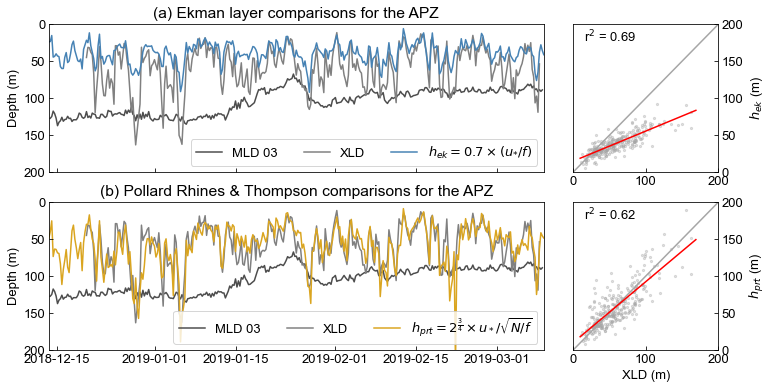

In [72]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(nrows=2,ncols=4)  # sets a grid of 1 rows by 4 column

mld = dat['mld_03'].rolling(time=3, center=True).mean()

### EKMAN TO XLD COMPARISON

ax = fig.add_subplot(gs[0, 0:3]) # this says first 3 grid points in rows, and 2 columns i.e., (a)

ax.plot(dat.time, mld, label='MLD 03', c='0.3')
ax.plot(dat.time, dat.xld, label='XLD', c='0.5')
ax.plot(dat.time, dat.h_ek, label=r'$ h_{ek} = 0.7 \times (u_{*}/ f) $', c='steelblue')

ax.set_xlim(dat.time.values[0], dat.time.values[-1])
ax.set_ylim(200, 0)

ax.set_ylabel('Depth (m)')
ax.set_title('(a) Ekman layer comparisons for the APZ')
ax.legend(loc=4, ncol=4)

ax.xaxis.set_ticklabels([])

ax = fig.add_subplot(gs[0, 3]) # this says first 3 grid points in rows, but use the position 2:4 columns i.e., (a)

ax.plot([0, 200], [0, 200], c='0.65')

ax.scatter(dat.xld, dat.h_ek, s=5, c='0.65', alpha=0.35)
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

y = dat.h_ek[~np.isnan(dat.xld)]
x = dat.xld[~np.isnan(dat.xld)]

m, b = np.polyfit(x, y, 1)

ax.plot(np.arange(10, 170), np.arange(10, 170)*m + b, c='r')

ax.text(15, 175, 'r$^2$ = '+str(np.round(np.corrcoef(x,y)[0][1]**2,2)))

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.set_ylabel('$h_{ek}$ (m)')

######################################################
### PRT TO XLD COMPARISON
######################################################

scale_factor = 1

# z = z*scale_factor

ax = fig.add_subplot(gs[1, 0:3]) # this says first 3 grid points in rows, and 2 columns i.e., (a)

ax.plot(dat.time, mld, label='MLD 03', c='0.3')
ax.plot(dat.time, dat.xld, label='XLD', c='0.5')
ax.plot(dat.time, dat.h_prt, label=r'$ h_{prt} = 2^{\frac{3}{4}} \times u_* / \sqrt{N/f} $', c='goldenrod')

ax.set_xlim(dat.time.values[0], dat.time.values[-1])
ax.set_ylim(200, 0)

ax.set_ylabel('Depth (m)')
ax.set_title('(b) Pollard Rhines & Thompson comparisons for the APZ')
ax.legend(loc=4, ncol=4)

ax = fig.add_subplot(gs[1, 3]) # this says first 3 grid points in rows, but use the position 2:4 columns i.e., (a)

ax.plot([0, 200], [0, 200], c='0.65')

z = dat.h_prt[~np.isnan(dat.xld)]
x = dat.xld[~np.isnan(dat.xld)]

ax.scatter(x, z, s=5, c='0.65', alpha=0.35)
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

m, b = np.polyfit(x, z, 1)

ax.plot(np.arange(10, 170), np.arange(10, 170)*m + b, c='r')

ax.text(15, 175, 'r$^2$ = '+str(np.round(np.corrcoef(x,z)[0][1]**2,2)))

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.set_ylabel('$h_{prt}$ (m)')
ax.set_xlabel('XLD (m)')

savefig('../../figures/mixing_vs_mixedlayers_APZ.png', dpi=300, bbox_inches='tight')

In [73]:
dat_saz_interp['h_max'] = (('time'), dat_saz_interp.h_ek)
dat_apz_interp['h_max'] = (('time'), dat_apz_interp.h_prt)
dat_miz_interp['h_max'] = (('time'), dat_miz_interp.h_ek)

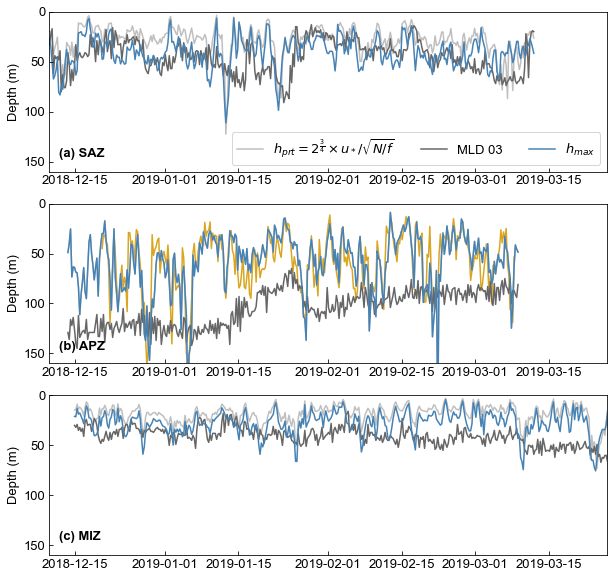

In [74]:
fig, ax = subplots(3, figsize=[10, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    mld = dat['mld_03'].rolling(time=3, center=True).mean()
    
    if i==1:
        ax[i].plot(dat.time, dat.xld,  label='XLD', c='goldenrod')
    
    ax[i].plot(dat.time, dat.h_prt,  label=r'$ h_{prt} = 2^{\frac{3}{4}} \times u_* / \sqrt{N/f} $', c='0.75')
    ax[i].plot(dat.time, dat.mld_03,        label='MLD 03',                               c='0.4')
    ax[i].plot(dat.time, dat.h_max,  label=r'$ h_{max}$', c='steelblue')
    

    
    ax[i].set_xlim('2018-12-10', '2019-03-26')
    ax[i].set_ylim(160, 0)
    
    ax[i].set_ylabel('Depth (m)')

ax[0].legend(loc=4, ncol=3)
    
ax[0].text('2018-12-12', 145, '(a) SAZ', fontweight='bold')
ax[1].text('2018-12-12', 147, '(b) APZ', fontweight='bold')
ax[2].text('2018-12-12', 145, '(c) MIZ', fontweight='bold')

savefig('../../figures/PRT_Ek_mixedlayers.png', dpi=300, bbox_inches='tight')

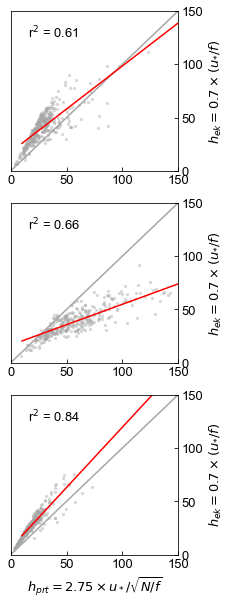

In [75]:
fig, ax = subplots(3, figsize=[3, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i].scatter(dat.h_prt, dat.h_ek, s=5, c='0.65', alpha=0.35)
    
    ax[i].set_ylabel(r'$ h_{ek} = 0.7 \times (u_{*}/ f) $')
    
    ax[i].plot([0, 200], [0, 200], c='0.65')
    
    ax[i].set_xlim(0, 150)
    ax[i].set_ylim(0, 150)
    
    y = dat.h_ek[~np.isnan(dat.h_prt)]
    x = dat.h_prt[~np.isnan(dat.h_prt)]
    
    m, b = np.polyfit(x, y, 1)
    
    ax[i].plot(np.arange(10, 170), np.arange(10, 170)*m + b, c='r')
    
    ax[i].text(15, 125, 'r$^2$ = '+str(np.round(np.corrcoef(x,y)[0][1]**2,2)))
    
    ax[i].yaxis.set_label_position("right")
    ax[i].yaxis.tick_right()
    
    ax[i].yaxis.set_ticks([0, 50, 100, 150])
    
ax[2].set_xlabel(r'$ h_{prt} = 2.75 \times u_* / \sqrt{N/f} $')

savefig('../../figures/PRT_Ek_mixedlayers_scatter.png', dpi=300, bbox_inches='tight')

### 2. Ekman Advection calculation

In [395]:
import scipy

def ekman_transport(dat, dt):
    
    taux = dat['taux_era5']              # N m-2
    h    = dat['h_max']                  # m
    f    = np.abs(gsw.f(dat.lat.mean())) # s-1
    rho0 = 1027                          # kg m-3
    
    ek_vel_v = taux / (rho0 * h * f) # m s-1
    
    vek_int = np.insert(integrate.cumtrapz(ek_vel_v,dx=dt),0,np.nan) # m
    
    vek_int[0]=np.nan; vek_int[-1]=np.nan
    dat['vek_int'] = (('time'), vek_int)
    
    dat['ek_anom'] = (dat['vek_int'] - gt.cleaning.rolling_window(dat['vek_int'], func=np.mean, window=10*4)) # m
    
    dat['ek_trans_dS'] =  dat['ek_anom'] * dat['dS_tsg'].values # g kg-1
    dat['ek_trans_dT'] =  dat['ek_anom'] * dat['dT_tsg'].values # degC
    
    return dat

In [396]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
        
    dat = ekman_transport(dat=dat, dt=dt)

#### Sarah's Ekman code

In [ ]:
f = coriolis(WG.Lat)
H_prt = ustar_wg_actual/sqrt(np.abs(n_wg*f))/5
tau_u = WG.Wind_stress_10m.bfill()*cos(np.deg2rad(WG.Wind_direction.bfill()))
tau_v = WG.Wind_stress_10m.bfill()*sin(np.deg2rad(WG.Wind_direction.bfill()))
ue = tau_v / (WG.Density.bfill().ffill() *H_prt * f) #* dpco2dic_ugrad
ve =  - (tau_u / (WG.Density.bfill().ffill()  * H_prt * f)) #*  dpco2dic_ugrad#
ek = ve + ue
# integrate to velocity to meters:
X = np.insert(integrate.cumtrapz(ue,dx=86400),0,np.nan)
Y = np.insert(integrate.cumtrapz(ve.bfill().ffill(),dx=86400),0,np.nan)
data = {‘Date’:WG.Date,‘Vek’:ve,‘Vek_int’:Y,‘Uek’:ue,‘Uek_int’:X}
ekv1 = pd.DataFrame(data)
ekv1 = ekv1.set_index(‘Date’)
ekv1[‘Vek_anom’] = ekv1.Vek_int-ekv1.Vek_int.rolling(24*7,center=True,min_periods=2).mean()#.bfill().ffill()
x = WG.PCO2_ocean_dic_anom.rolling(T,center=True,min_periods=2).mean().values#.ffill().bfill().values
#y = ekv.Vek_anom[1:-31].values*np.nanmax(grads_all)
y = ekv1[‘Vek_anom’]*np.nanmean(grads_all) #ekv.Vek_anom[24*3:-31].values*np.nanmean(broulgrads)

### 3. Entrainment

In [433]:
def entrainment(dat, mld, xld, dt):
    
    mld = gt.cleaning.rolling_window(mld, func=np.mean, window=4)
    xld = gt.cleaning.rolling_window(xld, func=np.mean, window=4)
    
    d_mld = xld-mld
    dh    = np.append(np.array(0), np.diff(xld)).astype(int) 
    
    we = dh/dt
    we[we<0]=0
    we[d_mld<0]=0
    
    xld = xld.astype(int).values
    mld = mld.astype(int).values
    
    S_xld = [dat.salt.values[i, val] for i, val in enumerate(xld)]
    S_mld = [dat.salt.values[i, val] for i, val in enumerate(mld)]
    
    T_xld = [dat.temp.values[i, val] for i, val in enumerate(xld)]
    T_mld = [dat.temp.values[i, val] for i, val in enumerate(mld)]
    
    S_xld=np.array(S_xld)
    S_mld=np.array(S_mld)
    
    T_xld=np.array(T_xld)
    T_mld=np.array(T_mld)
    
    ent_S = dt*(we*(S_xld - S_mld))/mld 
    ent_T = dt*(we*(T_xld - T_mld))/mld
    
    dat['ent_dS'] = (('time'), ent_S)
    dat['ent_dT'] = (('time'), ent_T)
    
    return dat

In [434]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
        
    dat = entrainment(dat=dat, mld=dat['mld_03'], xld=gt.cleaning.rolling_window(dat['h_max'], np.mean, window=4), dt=dt)

#### Plot MLD and mean profiles

In [370]:
# fig,ax=subplots(3,2, figsize=[6, 11], sharey=True)

# fig.subplots_adjust(hspace=0.2)

# for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
#     ax[i,0].plot(dat.temp.mean(dim='time'), dat.depth)
#     ax[i,0].fill_betweenx(x1=dat.temp.mean(dim='time')-dat.temp.std(dim='time'), x2=dat.temp.mean(dim='time')+dat.temp.std(dim='time'), y=dat.depth, alpha=0.25)
    
#     ax[i,1].plot(dat.salt.mean(dim='time'), dat.depth)
#     ax[i,1].fill_betweenx(x1=dat.salt.mean(dim='time')-dat.salt.std(dim='time'), x2=dat.salt.mean(dim='time')+dat.salt.std(dim='time'), y=dat.depth, alpha=0.25)
    
#     ax[i,0].set_xlabel('Temperature ($^{\circ}$C)')
#     ax[i,1].set_xlabel('Salinity (g kg$^{-1}$)')
#     ax[i,0].set_ylabel('Depth (m)')
    
#     for ii in range(2):
        
#         ax[i,ii].set_ylim(200, 0)
#         ax[i, ii].plot([-5, 40], [dat.mld_03.mean(dim='time'), dat.mld_03.mean(dim='time')], c='0.75')
#         ax[i, ii].fill_between(x=[-5, 40], y1=dat.mld_03.mean(dim='time')-dat.mld_03.std(dim='time'), y2=dat.mld_03.mean(dim='time')+dat.mld_03.std(dim='time'), facecolor='0.75', alpha=0.25)
#         ax[i, ii].yaxis.set_ticks_position('both')
#         ax[i, ii].xaxis.set_ticks_position('both')
        
# ax[0,0].set_xlim(7, 11)
# ax[1,0].set_xlim(-1, 3)
# ax[2,0].set_xlim(-2, 2)

# ax[0,1].set_xlim(34, 34.9)
# ax[1,1].set_xlim(34, 34.9)
# ax[2,1].set_xlim(34, 34.9)

# ax[0,0].text(7.2 , 25, 'a) SAZ', fontweight='bold')
# ax[0,1].text(34.6, 25, 'b) SAZ', fontweight='bold')

# ax[1,0].text(-0.8, 25, 'c) APZ', fontweight='bold')
# ax[1,1].text(34.6, 25, 'd) APZ', fontweight='bold')

# ax[2,0].text(-1.8, 25, 'e) MIZ', fontweight='bold')
# ax[2,1].text(34.6, 25, 'f) MIZ', fontweight='bold')

# savefig('../../figures/profiles_mean_mld.png', dpi=300, bbox_inches='tight')

### 4. Geostrophic eddy advection

In [183]:
adt = adt.resample(time=interp_res, loffset=offset).mean()

In [184]:
adt = adt.sel(latitude=slice(-63, -41), longitude=slice(-2, 9))

In [185]:
var_name = ['ugos', 'vgos']   

for var in tqdm(var_name):
  
    dat_saz_interp[var] = (('time'), my.interp_glider_era5(dat_saz_interp, adt, var=var))
    dat_apz_interp[var] = (('time'), my.interp_glider_era5(dat_apz_interp, adt, var=var))
    dat_miz_interp[var] = (('time'), my.interp_glider_era5(dat_miz_interp, adt, var=var))

100%|██████████| 2/2 [02:53<00:00, 86.81s/it]


In [186]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['ugos'] = dat['ugos'].bfill(dim='time').ffill(dim='time')
    dat['vgos'] = dat['vgos'].bfill(dim='time').ffill(dim='time')

In [371]:
# fig,ax=plt.subplots(3, figsize=[12, 9])

# for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):

#     ax[i].quiver(dat.time.values, dat.lat, dat.ugos, dat.vgos, scale=1.7, width=5e-4)

# ax[0].set_ylim(-43.5, -42.5)
# ax[1].set_ylim(-54.5, -53.5)
# ax[2].set_ylim(-60.6, -59.1)

In [383]:
import scipy

def geostrophic_transport(dat, dt):
    
    vgeo_int = np.insert(integrate.cumtrapz(dat['vgos'],dx=dt),0,np.nan) # units of m
        
    vgeo_int[0]=np.nan; vgeo_int[-1]=np.nan
    dat['vgeo_int'] = (('time'), vgeo_int)
    
    dat['vgeo_anom'] = (dat['vgeo_int']-gt.cleaning.rolling_window(dat['vgeo_int'], func=np.mean, window=10*4))
    
    dat['geo_trans_dS'] = (('time'),  dat['vgeo_anom']*dat['dS_tsg'].values)
    dat['geo_trans_dT'] = (('time'),  dat['vgeo_anom']*dat['dT_tsg'].values)
    
    return dat

In [384]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:

    dat = geostrophic_transport(dat=dat, dt=dt)

### Getting the heat and freshwater fluxes right

In [323]:
reanalysis = ['era5', 'jra55', 'merra']

for r in reanalysis:

    for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
        
        dat['ml_s_smooth'] = dat['ml_s_smooth'].bfill(dim='time').ffill(dim='time')
        dat['ml_t_smooth'] = dat['ml_t_smooth'].bfill(dim='time').ffill(dim='time')
        
        Q   = dat['qnet_'+str(r)]
        mld = dat['h_max']      
        E   = dat['e_'+str(r)]   
        P   = dat['tp_'+str(r)]  
        S   = dat['ml_s_smooth']        
      
        dat['dT_hf_'+str(r)]    = heatflux(Q=Q, mld=mld)      
        dat['dS_ff_'+str(r)]    = freshwaterflux(E=E, P=P, mld=mld, S=S)

In [373]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=2)

yearsFmt = mdates.DateFormatter("%d/%m")

colors = [ '#f39c12'
          ,'#21618c'
          ,'#e74c3c'
          ,'#884ea0'
          ,'#273746']

In [ ]:
from scipy import integrate

fig,ax=subplots(3,2, figsize=[20, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):

In [520]:
def get_synoptic_var(dat, window=10*4):
    
    dat_syn = dat - gt.cleaning.rolling_window(dat, func=np.mean, window=4*10)
    
    return dat_syn

def rolling_mean(dat, window=4):
    
    dat_mean = gt.cleaning.rolling_window(dat, func=np.mean, window=4)
    
    return dat_mean

In [540]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:

    xt=[]
    xs=[]
    
    for i, m in enumerate(np.round(dat['mld_03'].astype(int))):
        
        xt += dat.temp.sel(depth=slice(5, m)).mean(dim='depth').values[i],
        xs += dat.salt.sel(depth=slice(5, m)).mean(dim='depth').values[i],
    
    dat['ml_s'] = (('time'), xs)
    dat['ml_t'] = (('time'), xt)
    
    dat['ml_s_smooth'] = (('time'), gt.cleaning.rolling_window(dat['ml_s'], func=np.nanmean, window=4))
    dat['ml_t_smooth'] = (('time'), gt.cleaning.rolling_window(dat['ml_t'], func=np.nanmean, window=4))

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/help

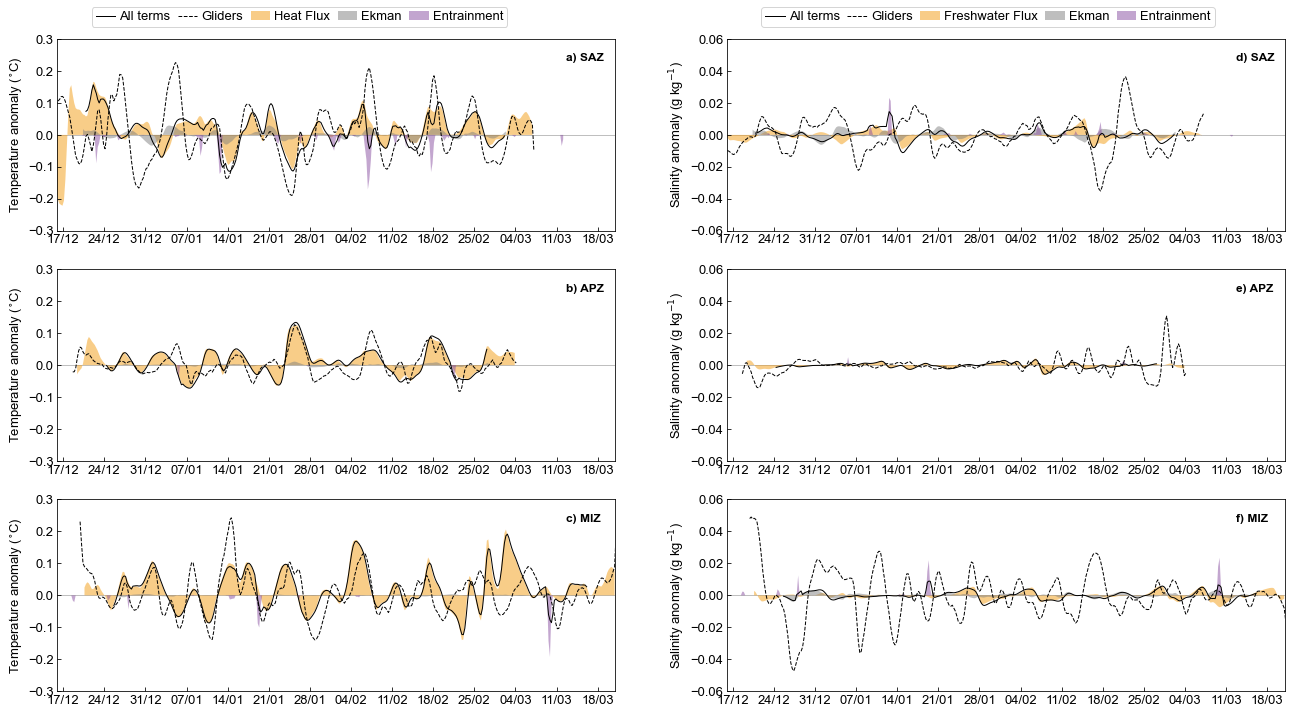

In [546]:
from scipy import integrate

fig,ax=subplots(3,2, figsize=[22, 12])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ### heat and freshwater fluxes ###
    
    # cumulative sum of the temperature and salinity terms
    hf_int = integrate.cumtrapz(dat['dT_hf_era5'], dx=dt, initial=np.nan); hf_int[-1] = np.nan # changing from units of degC/s to degC
    ff_int = integrate.cumtrapz(dat['dS_ff_era5'], dx=dt, initial=np.nan); ff_int[-1] = np.nan # changing from units of psu/s  to psu
    
    # removing the 10 day rolling mean (seasonal trend)
    dat['hf_anom'] = get_synoptic_var(hf_int)
    dat['ff_anom'] = get_synoptic_var(ff_int)
    
    # 4 window rolling mean to remove sub-intertial processes
    dat['hf_anom'] = rolling_mean(dat['hf_anom'])
    dat['ff_anom'] = rolling_mean(dat['ff_anom'])
    
    ax[i,0].fill_between(x=dat.time.values, y1=0, y2=dat['hf_anom'], facecolor=colors[0], alpha=0.5, label='Heat Flux')
    ax[i,1].fill_between(x=dat.time.values, y1=0, y2=dat['ff_anom'], facecolor=colors[0], alpha=0.5, label='Freshwater Flux')
    
    ### ekman transport ###
    
#     ax[i,0].plot(dat.time, dat['ek_trans_dT'], c=colors[1], label='Ekman')
#     ax[i,1].plot(dat.time, dat['ek_trans_dS'], c=colors[1], label='Ekman') 

    # 4 window rolling mean to remove sub-intertial processes
    dat['ek_T'] = get_synoptic_var(dat['ek_trans_dT'])
    dat['ek_S'] = get_synoptic_var(dat['ek_trans_dS'])
    
    ax[i,0].fill_between(x=dat.time.values, y1=0, y2=dat['ek_T'], facecolor='0.5', alpha=0.5, label='Ekman')
    ax[i,1].fill_between(x=dat.time.values, y1=0, y2=dat['ek_S'], facecolor='0.5', alpha=0.5, label='Ekman')
    
    ### geostrophic transport ###
    
#     ax[i,0].plot(dat.time, dat['geo_trans_dT'], c=colors[2], label='Geostrophic')
#     ax[i,1].plot(dat.time, dat['geo_trans_dS'], c=colors[2], label='Geostrophic')  
    
    ### entrainment ###
    
    ax[i,0].fill_between(x=dat.time.values, y1=0, y2=dat['ent_dT'], facecolor=colors[3], alpha=0.5, label='Entrainment')
    ax[i,1].fill_between(x=dat.time.values, y1=0, y2=dat['ent_dS'], facecolor=colors[3], alpha=0.5, label='Entrainment') 
    
    ### all terms ###
    
    all_terms_T = dat['hf_anom'].values + dat['ek_T'].values + dat['ent_dT'].values
    all_terms_S = dat['ff_anom'].values + dat['ek_S'].values + dat['ent_dS'].values
    
    # 4 window rolling mean to remove sub-intertial processes
    dat['all_terms_T'] = rolling_mean(all_terms_T)
    dat['all_terms_S'] = rolling_mean(all_terms_S)
    
    ax[i,0].plot(dat.time.values, dat['all_terms_T'], c='k', lw=1, label='All terms')
    ax[i,1].plot(dat.time.values, dat['all_terms_S'], c='k', lw=1, label='All terms')
    
    ### glider data ###
    
#     gl_T = gt.cleaning.rolling_window(dat['ml_t_smooth'], np.mean, window=4)
#     gl_S = gt.cleaning.rolling_window(dat['ml_s_smooth'], np.mean, window=4)
    
    gl_T = dat['ml_t_smooth']
    gl_S = dat['ml_s_smooth']

    gl_T = dat.ml_t_smooth - gt.cleaning.rolling_window(gl_T, np.mean, window=10*4)
    gl_S = dat.ml_s_smooth - gt.cleaning.rolling_window(gl_S, np.mean, window=10*4)
    
    gl_T = gt.cleaning.rolling_window(gl_T.values, np.mean, window=4)
    gl_S = gt.cleaning.rolling_window(gl_S.values, np.mean, window=4)
    
    ax[i,0].plot(dat.time[20:-20], gl_T[20:-20], c='k', ls='--', lw=1, label='Gliders')
    ax[i,1].plot(dat.time[20:-20], gl_S[20:-20], c='k', ls='--', lw=1, label='Gliders')
    
    ax[i,0].set_ylim(-0.3, 0.3)
    ax[i,1].set_ylim(-0.06, 0.06)
    
    ax[i,0].set_ylabel('Temperature anomaly ($^{\circ}$C)')
    ax[i,1].set_ylabel('Salinity anomaly (g kg$^{-1}$)')
    
    for ii in range(2):
        ax[i,ii].xaxis.set_major_locator(weeks)
        ax[i,ii].xaxis.set_minor_locator(week)
        ax[i,ii].xaxis.set_major_formatter(yearsFmt)
        ax[i,ii].set_xlim('2018-12-16', '2019-03-21')
        ax[i,ii].plot([pd.to_datetime('2018-12-16'), pd.to_datetime('2019-03-21')], [0, 0], zorder=0, lw=1, c='0.75')
        
ax[0,0].legend(ncol=5, handletextpad=0.3, borderpad=0.3, loc=2, bbox_to_anchor=(0.05, 1.2), columnspacing=0.6, handlelength=1.5)
ax[0,1].legend(ncol=5, handletextpad=0.3, borderpad=0.3, loc=2, bbox_to_anchor=(0.05, 1.2), columnspacing=0.6, handlelength=1.5)

ax[0, 0].text(dat_miz_interp.time.values[-55], 0.23, 'a) SAZ', fontsize=12, fontweight='bold')
ax[1, 0].text(dat_miz_interp.time.values[-55], 0.23, 'b) APZ',  fontsize=12, fontweight='bold')
ax[2, 0].text(dat_miz_interp.time.values[-55], 0.23, 'c) MIZ',  fontsize=12, fontweight='bold')

ax[0, 1].text(dat_miz_interp.time.values[-55], 0.046, 'd) SAZ', fontsize=12, fontweight='bold')
ax[1, 1].text(dat_miz_interp.time.values[-55], 0.046, 'e) APZ', fontsize=12, fontweight='bold')
ax[2, 1].text(dat_miz_interp.time.values[-55], 0.046, 'f) MIZ', fontsize=12, fontweight='bold')

savefig('../../figures/terms_glider_synop_var.png', dpi=300, bbox_inches='tight')

In [487]:
def calc_gl_disp(dat):
    
    dlat = gsw.distance(np.zeros(len(dat.lat)), dat.lat.values)
    dlat[dat.lat.diff(dim='time')>0] = -dlat[dat.lat.diff(dim='time')>0]
    
    dat['gl_disp_dS'] =  np.cumsum(np.append(0,dlat) * dat['dS_grad'].values) # g kg-1
    dat['gl_disp_dT'] =  np.cumsum(np.append(0,dlat) * dat['dT_grad'].values) # degC
    
    return dat
    

In [488]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat = calc_gl_disp(dat)

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)


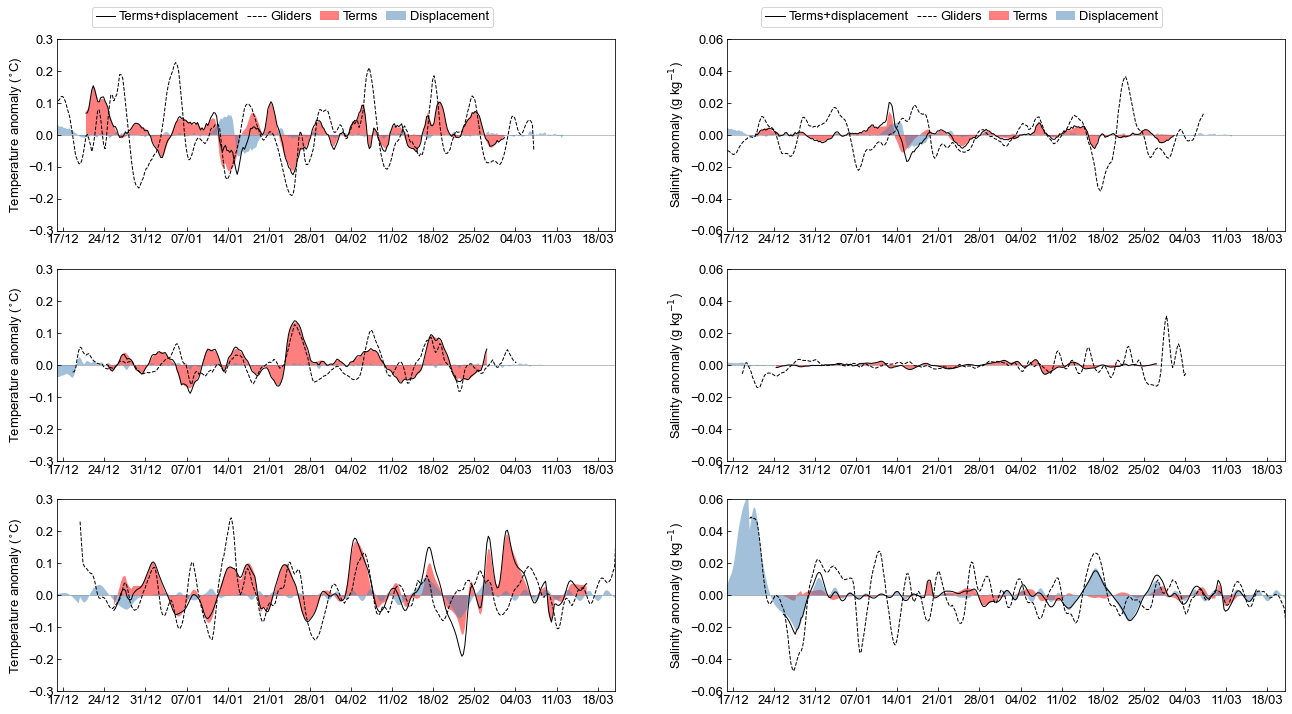

In [544]:
fig,ax=subplots(3,2, figsize=[22, 12])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i,0].fill_between(x=dat.time.values, y1=0, y2=dat['all_terms_T'], facecolor='r', alpha=0.5, label='Terms')
    ax[i,1].fill_between(x=dat.time.values, y1=0, y2=dat['all_terms_S'], facecolor='r', alpha=0.5, label='Terms')
    
    dS_disp = rolling_mean(dat.gl_disp_dS)
    dT_disp = rolling_mean(dat.gl_disp_dT)
    
    dS_disp = get_synoptic_var(dS_disp)
    dT_disp = get_synoptic_var(dT_disp)

    ax[i,0].fill_between(x=dat.time.values, y1=0, y2=dT_disp, facecolor='steelblue', alpha=0.5, label='Displacement')
    ax[i,1].fill_between(x=dat.time.values, y1=0, y2=dS_disp, facecolor='steelblue', alpha=0.5, label='Displacement')
    
    
    ### terms + displacement 
    
    terms_disp_S = dS_disp.values + dat['all_terms_S']
    terms_disp_T = dT_disp.values + dat['all_terms_T']
    
    ax[i,0].plot(dat.time.values, terms_disp_T, c='k', lw=1, label='Terms+displacement')
    ax[i,1].plot(dat.time.values, terms_disp_S, c='k', lw=1, label='Terms+displacement')

    
    ### glider t and s
    
    gl_T = dat['ml_t_smooth']
    gl_S = dat['ml_s_smooth']

    gl_T = get_synoptic_var(gl_T)
    gl_S = get_synoptic_var(gl_S)
    
    gl_T = rolling_mean(gl_T.values)
    gl_S = rolling_mean(gl_S.values)
    
    ax[i,0].plot(dat.time[20:-20], gl_T[20:-20], c='k', ls='--', lw=1, label='Gliders')
    ax[i,1].plot(dat.time[20:-20], gl_S[20:-20], c='k', ls='--', lw=1, label='Gliders')
    
    ax[i,0].set_ylim(-0.3, 0.3)
    ax[i,1].set_ylim(-0.06, 0.06)
    
    ax[i,0].set_ylabel('Temperature anomaly ($^{\circ}$C)')
    ax[i,1].set_ylabel('Salinity anomaly (g kg$^{-1}$)')
    
    for ii in range(2):
        ax[i,ii].xaxis.set_major_locator(weeks)
        ax[i,ii].xaxis.set_minor_locator(week)
        ax[i,ii].xaxis.set_major_formatter(yearsFmt)
        ax[i,ii].set_xlim('2018-12-16', '2019-03-21')
        ax[i,ii].plot([pd.to_datetime('2018-12-16'), pd.to_datetime('2019-03-21')], [0, 0], zorder=0, lw=1, c='0.75')
        
ax[0,0].legend(ncol=5, handletextpad=0.3, borderpad=0.3, loc=2, bbox_to_anchor=(0.05, 1.2), columnspacing=0.6, handlelength=1.5)
ax[0,1].legend(ncol=5, handletextpad=0.3, borderpad=0.3, loc=2, bbox_to_anchor=(0.05, 1.2), columnspacing=0.6, handlelength=1.5)

savefig('../../figures/terms_glider_disp_synop_var.png', dpi=300, bbox_inches='tight')

#### On the role of air-sea fluxes and ekman advection

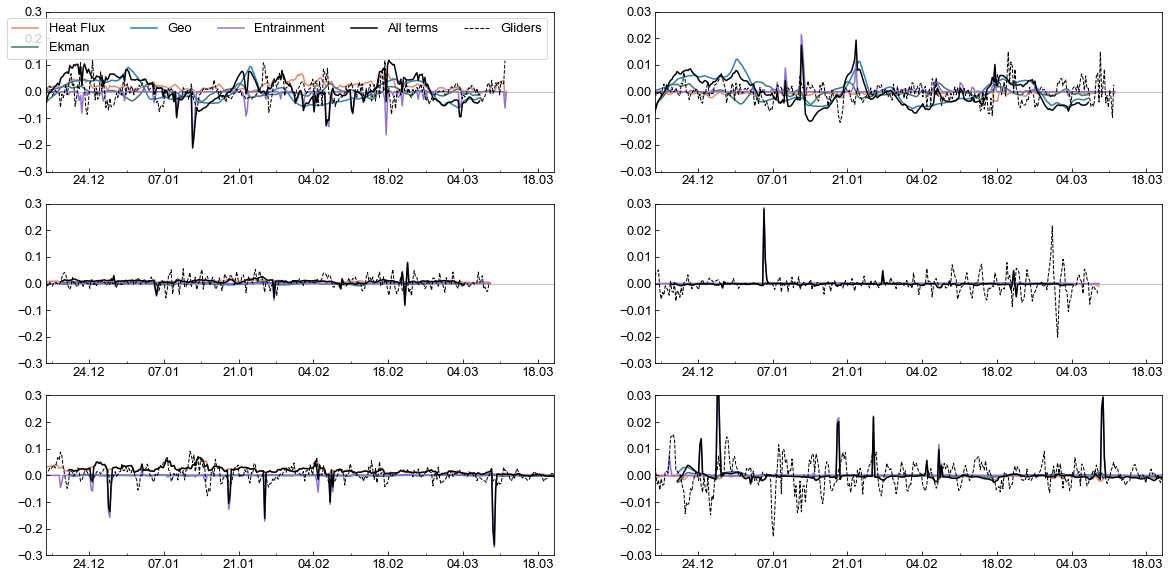

In [274]:
from scipy import integrate

fig,ax=subplots(3,2, figsize=[20, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ### air-sea heat and freshwater fluxes

    dT_hf = dat['dT_hf_era5'] * 21600
    dS_ff = dat['dS_ff_era5'] * 21600
    
    dT_hf = gt.cleaning.rolling_window(dT_hf, func=np.mean, window=4)
    dS_ff = gt.cleaning.rolling_window(dS_ff, func=np.mean, window=4)
    
#     dT_hf = dT_hf.resample(time='1D', loffset='12H').mean()
#     dS_ff = dS_ff.resample(time='1D', loffset='12H').mean()
    
    ax[i,0].plot(dT_hf.time, dT_hf, c='#e9896a', label='Heat Flux')
    ax[i,1].plot(dS_ff.time, dS_ff, c='#e9896a', label='Freshwater Flux')
    
    ### ekman transport
    
    ek_T_int = integrate.cumtrapz(dat['ek_trans_dT'], dx=dt, initial=np.nan)
    ek_S_int = integrate.cumtrapz(dat['ek_trans_dS'], dx=dt, initial=np.nan)
    
    ax[i,0].plot(dat.time, dat['ek_trans_dT'], c='#387c6d', label='Ekman')
    ax[i,1].plot(dat.time, dat['ek_trans_dS'], c='#387c6d', label='Ekman')
    
    ### geo transport
    
    ax[i,0].plot(dat.time, dat['dT_geo_adv'], c='#2980b9', label='Geo')
    ax[i,1].plot(dat.time, dat['dS_geo_adv'], c='#2980b9', label='Geo')
    
    ### entrainment
    
    ax[i,0].plot(dat.time, dat['dT_ent'], c='mediumpurple', label='Entrainment')
    ax[i,1].plot(dat.time, dat['dS_ent'], c='mediumpurple', label='Entrainment')
    
    ### all terms
    
    all_terms_T = dT_hf + dat['ek_trans_dT'] + dat['dT_geo_adv'] + dat['dT_ent']
    all_terms_S = dS_ff + dat['ek_trans_dS'] + dat['dS_geo_adv'] + dat['dS_ent']
  
    ax[i,0].plot(dat.time, all_terms_T, c='k', label='All terms')
    ax[i,1].plot(dat.time, all_terms_S, c='k', label='All terms')    
    
    ### glider data
    
    gl_T = dat['ml_t_smooth'].bfill(dim='time')
    gl_S = dat['ml_s_smooth'].bfill(dim='time')
    
#     gl_T[0]=np.nan; gl_T[-1]=np.nan
#     gl_S[0]=np.nan; gl_S[-1]=np.nan
    
#     gl_T = gl_T-gt.cleaning.rolling_window(gl_T, func=np.mean, window=4*10)
#     gl_S = gl_S-gt.cleaning.rolling_window(gl_S, func=np.mean, window=4*10)
    
#     gl_T = gt.cleaning.rolling_window(gl_T.values, func=np.mean, window=4)
#     gl_S = gt.cleaning.rolling_window(gl_S.values, func=np.mean, window=4)
    
    ax[i,0].plot(dat.time[1:], gl_T.diff(dim='time'), c='k', lw=1, ls='--', label='Gliders', zorder=3)
    ax[i,1].plot(dat.time[1:], gl_S.diff(dim='time'), c='k', lw=1, ls='--', label='Gliders', zorder=3)
    
#     ax[i,0].text(dat.time.values[40], 0.23, 'r$^2$ = '+str(np.round(np.corrcoef(hf_anom[23:-21], gl_T[23:-21])[0,1]**2, 2)), c='#e9896a', fontweight='bold')
#     ax[i,1].text(dat.time.values[40], 0.038, 'r$^2$ = '+str(np.round(np.corrcoef(ff_anom[23:-21], gl_S[23:-21])[0,1]**2, 2)), c='#e9896a', fontweight='bold')
    
#     ax[i,0].text(dat.time.values[90], 0.23, 'r$^2$ = '+str(np.round(np.corrcoef(dat['ek_trans_dT'][23:-21], gl_T[23:-21])[0,1]**2, 2)), c='#387c6d', fontweight='bold')
#     ax[i,1].text(dat.time.values[90], 0.038, 'r$^2$ = '+str(np.round(np.corrcoef(dat['ek_trans_dS'][23:-21], gl_S[23:-21])[0,1]**2, 2)), c='#387c6d', fontweight='bold')
    
#     ax[i,0].text(dat.time.values[140], 0.23, 'r$^2$ = '+str(np.round(np.corrcoef(dat['dT_geo_adv'][23:-21], gl_T[23:-21])[0,1]**2, 2)), c='#2980b9', fontweight='bold')
#     ax[i,1].text(dat.time.values[140], 0.038, 'r$^2$ = '+str(np.round(np.corrcoef(dat['dS_geo_adv'][23:-21], gl_S[23:-21])[0,1]**2, 2)), c='#2980b9', fontweight='bold')
    
#     ax[i,0].text(dat.time.values[190], 0.23,  'r$^2$ = '+str(np.round(np.corrcoef(all_terms_T[23:-21], gl_T[23:-21])[0,1]**2, 2)), c='k', fontweight='bold')
#     ax[i,1].text(dat.time.values[190], 0.038, 'r$^2$ = '+str(np.round(np.corrcoef(all_terms_S[23:-21], gl_S[23:-21])[0,1]**2, 2)), c='k', fontweight='bold')
    
    ax[i,0].set_ylim(-0.3, 0.3)
    ax[i,1].set_ylim(-0.03, 0.03)
    
    for ii in range(2):
        ax[i,ii].xaxis.set_major_locator(weeks)
        ax[i,ii].xaxis.set_minor_locator(week)
        ax[i,ii].xaxis.set_major_formatter(yearsFmt)
        ax[i,ii].set_xlim('2018-12-16', '2019-03-21')
        ax[i,ii].plot([pd.to_datetime('2018-12-16'), pd.to_datetime('2019-03-21')], [0, 0], zorder=0, lw=1, c='0.75')
        
ax[0,0].legend(ncol=5)

In [236]:
dat.ml_t_smooth.bfill(dim='time')

<xarray.DataArray 'ml_t_smooth' (time: 406)>
array([-1.24168879, -1.24168879, -1.22623797, -1.21371938, -1.20410239,
       -1.18783545, -1.17136787, -1.14360698, -1.1187538 , -1.08699159,
       -1.04889387, -1.0215065 , -0.97407466, -0.90741681, -0.84957693,
       -0.76237278, -0.68650631, -0.65320652, -0.64773954, -0.66927713,
       -0.71822004, -0.74372179, -0.72675617, -0.71230472, -0.69946573,
       -0.70228391, -0.69627343, -0.68992651, -0.66173713, -0.64819992,
       -0.67003196, -0.68853151, -0.69281804, -0.67812131, -0.66014061,
       -0.64748137, -0.64516269, -0.64788933, -0.65586106, -0.66600539,
       -0.67471483, -0.67589848, -0.66235942, -0.64889978, -0.63464269,
       -0.62905198, -0.61841804, -0.60069535, -0.57097939, -0.53486144,
       -0.51085866, -0.50199675, -0.53261798, -0.55754971, -0.56824257,
       -0.56751053, -0.55349275, -0.55645847, -0.55182857, -0.53850092,
       -0.52426377, -0.48029134, -0.46275791, -0.44404718, -0.41152067,
       -0.39868589, -0.37078158, -0.35291247, -0.34335568, -0.31564342,
       -0.29816713, -0.30560626, -0.31960974, -0.37494891, -0.4140884 ,
       -0.41518278, -0.41590836, -0.39086821, -0.36868791, -0.34418097,
       -0.30198693, -0.27679072, -0.2747943 , -0.27737959, -0.29446802,
       -0.31927858, -0.31434341, -0.31721136, -0.31326941, -0.28041097,
       -0.24267109, -0.21237565, -0.16442227, -0.1142743 , -0.05297367,
        0.01731009,  0.03765946,  0.05314383,  0.03010984,  0.01880424,
...
        1.33272978,  1.34191047,  1.34436601,  1.36488242,  1.3854285 ,
        1.39112459,  1.40311797,  1.40163073,  1.4047141 ,  1.41082783,
        1.40776394,  1.42187416,  1.42545809,  1.43418707,  1.43760475,
        1.43260263,  1.43190867,  1.41176452,  1.40270232,  1.39472261,
        1.38308042,  1.36578399,  1.34683331,  1.32546333,  1.29877709,
        1.29615156,  1.29388672,  1.30125317,  1.30080546,  1.2788771 ,
        1.26510502,  1.24921941,  1.2117078 ,  1.18788953,  1.15505492,
        1.1241995 ,  1.11960259,  1.14978038,  1.16697603,  1.18639966,
        1.19566313,  1.19807471,  1.17913353,  1.15977346,  1.16016903,
        1.14616319,  1.15673452,  1.18285612,  1.19657015,  1.19535778,
        1.19831993,  1.18836445,  1.18037019,  1.17098685,  1.15806689,
        1.13873679,  1.12341083,  1.11830957,  1.1184249 ,  1.12603748,
        1.14076887,  1.148315  ,  1.15443607,  1.16224048,  1.16765964,
        1.16802247,  1.16011456,  1.13698413,  1.1222875 ,  1.10985112,
        1.09896327,  1.09719704,  1.09314871,  1.1010995 ,  1.10614312,
        1.0945738 ,  1.07014097,  1.0327905 ,  1.00642273,  0.99651538,
        0.99192605,  0.98219862,  0.96437602,  0.9347464 ,  0.88929885,
        0.83964979,  0.79472722,  0.75083494,  0.72048491,  0.70173476,
        0.67669339,  0.64677562,  0.61853591,  0.59413947,  0.60039139,
               nan])
Coordinates:
  * time     (time) datetime64[ns] 2018-12-14T21:00:00 ... 2019-03-26T03:00:00

In [ ]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)


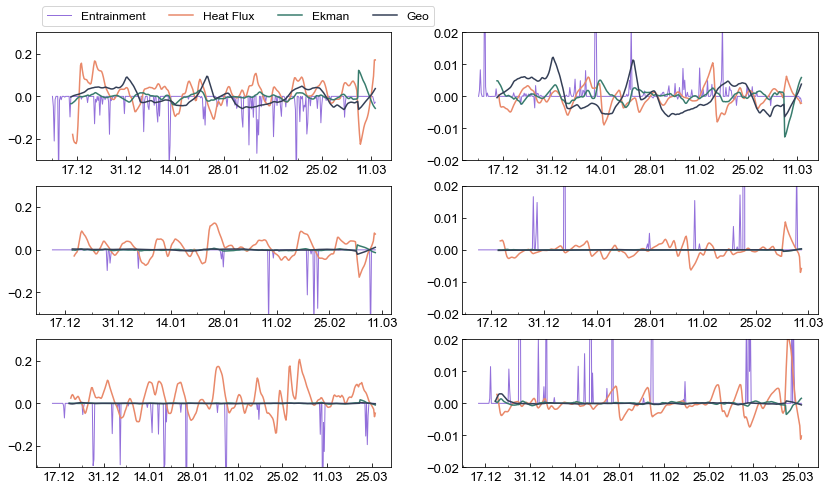

In [322]:


fig,ax=subplots(3,2, figsize=[14, 8])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ### entrainment
    ax[i,0].plot(dat.time, dat['dT_ent'], label='Entrainment', c='mediumpurple', lw=1)
    ax[i,1].plot(dat.time, dat['dS_ent'], label='Entrainment', c='mediumpurple', lw=1)
    
    ### air-sea heat and freshwater fluxes
    hf_int = integrate.cumtrapz(dat['dT_hf_era5'], dx=dt, initial=np.nan)
    ff_int = integrate.cumtrapz(dat['dS_ff_era5'], dx=dt, initial=np.nan)
    
    hf_anom = hf_int - gt.cleaning.rolling_window(hf_int, func=np.mean, window=4*10)
    ff_anom = ff_int - gt.cleaning.rolling_window(ff_int, func=np.mean, window=4*10)
    
    hf_anom = gt.cleaning.rolling_window(hf_anom, func=np.mean, window=4)
    ff_anom = gt.cleaning.rolling_window(ff_anom, func=np.mean, window=4)
    
    ax[i,0].plot(dat.time, hf_anom, c='#e9896a', label='Heat Flux')
    ax[i,1].plot(dat.time, ff_anom, c='#e9896a', label='Freshwater Flux')
    
    ### ekman transport
    ax[i,0].plot(dat.time, dat['ek_trans_dT'], c='#387c6d', label='Ekman')
    ax[i,1].plot(dat.time, dat['ek_trans_dS'], c='#387c6d', label='Ekman')
    
    ### geostrophic transport
    ax[i,0].plot(dat.time, dat['dT_geo_adv'], c='#343f56', label='Geo')
    ax[i,1].plot(dat.time, dat['dS_geo_adv'], c='#343f56', label='Geo')
    
#     ### net terms
#     net_T = entT_int + hf_int + dat['ek_trans_dT'] + dat['dT_geo_adv']
#     net_S = entS_int + ff_int + dat['ek_trans_dS'] + dat['dS_geo_adv']
    
#     ax[i,0].plot(dat.time, net_T, c='k', label='Net terms')
#     ax[i,1].plot(dat.time, net_S, c='k', label='Net terms')
    
#     ### glider data
#     ax[i,0].plot(dat.time, dat['ml_t_smooth']-dat['ml_t_smooth'][0], c='k', lw=1, ls='--', label='Gliders', zorder=3)
#     ax[i,1].plot(dat.time, dat['ml_s_smooth']-dat['ml_s_smooth'][0], c='k', lw=1, ls='--', label='Gliders', zorder=3)
    
    ax[i,0].set_ylim(-0.3, 0.3)
    ax[i,1].set_ylim(-0.02, 0.02)
    
    for ii in range(2):
        ax[i,ii].xaxis.set_major_locator(weeks)
        ax[i,ii].xaxis.set_minor_locator(week)
        ax[i,ii].xaxis.set_major_formatter(yearsFmt)

ax[0,0].legend(ncol=6, loc=2, fontsize=12, bbox_to_anchor=(0, 1.25))




/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/glidertools/helpers.py:70: GliderToolsWarning: Primary input variable is not xr.DataArray data type - no metadata to pass on.
  warnings.warn(msg, category=GliderToolsWarning)


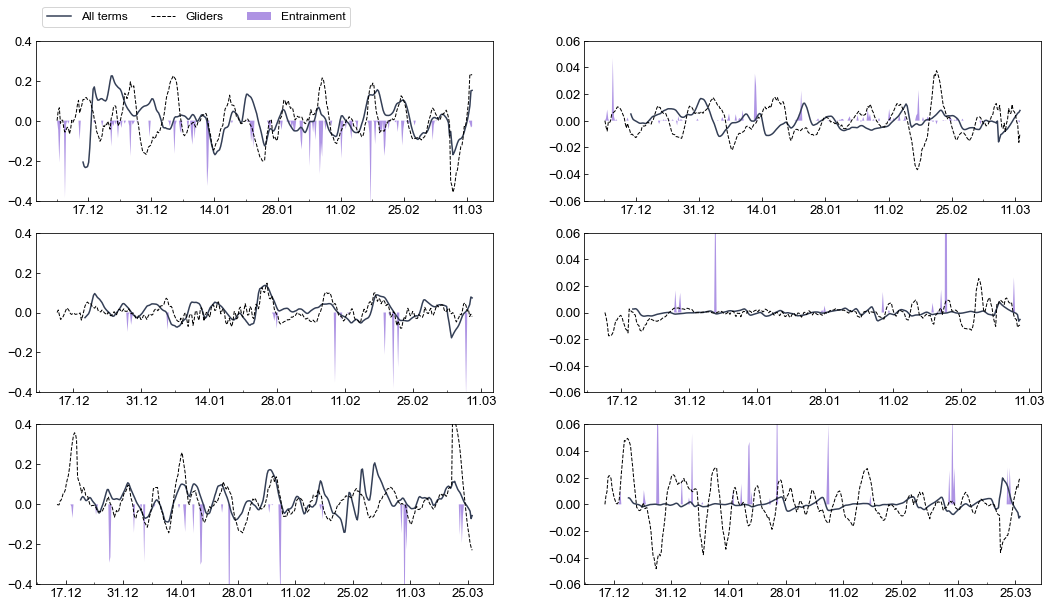

In [328]:
from scipy import integrate

fig,ax=subplots(3,2, figsize=[18, 10])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    entS = dat['dS_ent']
    entT = dat['dT_ent']
    
    hf_int = integrate.cumtrapz(dat['dT_hf_era5'], dx=dt, initial=np.nan)
    ff_int = integrate.cumtrapz(dat['dS_ff_era5'], dx=dt, initial=np.nan)
    
    hf_anom = hf_int - gt.cleaning.rolling_window(hf_int, func=np.mean, window=4*10)
    ff_anom = ff_int - gt.cleaning.rolling_window(ff_int, func=np.mean, window=4*10)
    
    ffS = gt.cleaning.rolling_window(ff_anom, func=np.mean, window=4)
    hfT = gt.cleaning.rolling_window(hf_anom, func=np.mean, window=4)
    
    ekS = dat['ek_trans_dS']
    ekT = dat['ek_trans_dT']
    
    geoS = dat['dS_geo_adv']
    geoT = dat['dT_geo_adv']
    
    dat['allterms_S'] = ffS + ekS + geoS
    dat['allterms_T'] = hfT + ekT + geoT
    
    ### geostrophic transport
    ax[i,0].plot(dat.time, dat['allterms_T'], c='#343f56', label='All terms')
    ax[i,1].plot(dat.time, dat['allterms_S'], c='#343f56', label='All terms')
    
    ### glider data
    ax[i,0].plot(dat.time, dat['ml_t_smooth']-gt.cleaning.rolling_window(dat['ml_t_smooth'], func=np.mean, window=4*10), c='k', lw=1, ls='--', label='Gliders', zorder=3)
    ax[i,1].plot(dat.time, dat['ml_s_smooth']-gt.cleaning.rolling_window(dat['ml_s_smooth'], func=np.mean, window=4*10), c='k', lw=1, ls='--', label='Gliders', zorder=3)
    
    ### entrainment
    ax[i,0].fill_between(dat.time.values, y1=0, y2=dat['dT_ent'], facecolor='mediumpurple', alpha=0.75, label='Entrainment')
    ax[i,1].fill_between(dat.time.values, y1=0, y2=dat['dS_ent'], facecolor='mediumpurple', alpha=0.75, label='Entrainment')
    
    ax[i,0].set_ylim(-0.4, 0.4)
    ax[i,1].set_ylim(-0.06, 0.06)
    
    for ii in range(2):
        ax[i,ii].xaxis.set_major_locator(weeks)
        ax[i,ii].xaxis.set_minor_locator(week)
        ax[i,ii].xaxis.set_major_formatter(yearsFmt)

ax[0,0].legend(ncol=5, loc=2, fontsize=12, bbox_to_anchor=(0, 1.25))




In [331]:
dat = dat_saz_interp 

terms   = dat['allterms_T'] 
obs     = dat['ml_t_smooth']-gt.cleaning.rolling_window(dat['ml_t_smooth'], func=np.mean, window=4*10)
obs     = obs[~np.isnan(terms)]
terms   = terms[~np.isnan(terms)]

np.corrcoef(obs, terms)

array([[1.        , 0.29638785],
       [0.29638785, 1.        ]])

### Get the mean from the datasets

In [1313]:
var = ['dT_hf_', 'dT_ek_adv_', 'dT_ent_', 'dS_ff_', 'dS_ek_adv_', 'dS_ent_']

for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
    
    for i, v in enumerate(var):
        
        if v == var[2] or v == var[5]:
            
#             mld_mean = np.round(dat.mld_03.std(dim='time')).astype(int).values
#             dat[str(v)+'mean'] = dat[v+str(mld_mean)]
            
            dat[str(v)+'mean'] = np.ma.mean( [dat[v+'2'].values, dat[v+'5'].values, dat[v+'10'].values] , axis=0 )
            dat[str(v)+'min']  = np.ma.min ( [dat[v+'2'].values, dat[v+'5'].values, dat[v+'10'].values] , axis=0 )
            dat[str(v)+'max']  = np.ma.max ( [dat[v+'2'].values, dat[v+'5'].values, dat[v+'10'].values] , axis=0 )            
        
        else:
            
            dat[str(v)+'mean'] = np.ma.mean( [ dat[v+'era5'].values, dat[v+'jra55'].values, dat[v+'merra'].values ] , axis=0 )
            dat[str(v)+'min']  = np.ma.min ( [ dat[v+'era5'].values, dat[v+'jra55'].values, dat[v+'merra'].values ] , axis=0 )
            dat[str(v)+'max']  = np.ma.max ( [ dat[v+'era5'].values, dat[v+'jra55'].values, dat[v+'merra'].values ] , axis=0 )
        

In [1314]:
flx_clrs = ['#3498db', '#075e99', '#073350']

ek_clrs  = ['#4da589',  '#247a5f', '#054430']

ent_clrs = ['#d65566', '#a52e3e', '#650714']

## Plot the terms and the sum of terms
---

### Temperature

In [1343]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['dT_sum_terms_mean'] = (('time'), 
                                  dat['dT_hf_mean'].values 
                                + dat['dT_ent_mean'].values 
                                + dat['dT_ek_adv_mean'].values 
                                + dat['dT_geo_adv'].values/3
                               )
        
    dat['dT_sum_terms_min']  = (('time'), dat['dT_hf_mean']    .values - dat['dT_hf_min']    .values 
                                        + dat['dT_ent_mean']   .values - dat['dT_ent_min']   .values 
                                        + dat['dT_ek_adv_mean'].values - dat['dT_ek_adv_min'].values)
    
    dat['dT_sum_terms_max']  = (('time'), dat['dT_hf_max']    .values  - dat['dT_hf_mean']    .values 
                                        + dat['dT_ent_max']   .values  - dat['dT_ent_mean']   .values 
                                        + dat['dT_ek_adv_max'].values  - dat['dT_ek_adv_mean'].values)
    

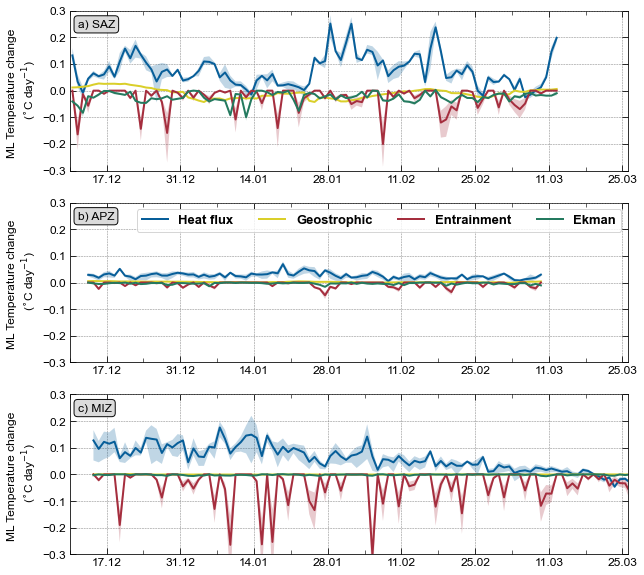

In [1344]:
fig, ax = subplots(3, figsize=[10, 10])

props = dict(zorder=10)

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i].grid(c='0.5', lw=0.5, ls='--', zorder=0)
    
    ax[i].plot(dat.time, dat['dT_hf_mean'], label='Heat flux', c=flx_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dT_hf_min'], y2=dat['dT_hf_max'], facecolor=flx_clrs[1], alpha=0.25, **props)
    
    ax[i].plot(dat.time, dat['dT_geo_adv']/3, label='Geostrophic', c='#dacf2a', **props)
    
    ax[i].plot(dat.time, dat['dT_ent_mean'], label='Entrainment', c=ent_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dT_ent_min'], y2=dat['dT_ent_max'], facecolor=ent_clrs[1], alpha=0.25, **props)
    
    ax[i].plot(dat.time, dat['dT_ek_adv_mean'], label='Ekman', c=ek_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dT_ek_adv_min'], y2=dat['dT_ek_adv_max'], facecolor=ek_clrs[1], alpha=0.25, **props)
    
    

    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    
    ax[i].set_ylabel('ML Temperature change \n ($^{\circ}$C day$^{-1}$)')
    
ax[0].set_ylim(-0.3, 0.3)
ax[1].set_ylim(-0.3, 0.3)
ax[2].set_ylim(-0.3, 0.3)

legend_properties = {'weight':'bold', 'size': 13}
ax[1].legend(loc=1, ncol=4, prop=legend_properties)

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 0.23, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_saz_interp.time.values[1], 0.23, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_saz_interp.time.values[1], 0.23, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)

for a in ax:
    
    a.set_xlim('2018-12-10', '2019-03-26')
    
savefig('../../figures/ml_temp_change.png', dpi=300, bbox_inches='tight')

### TEMPERATURE SUM OF ALL TERMS

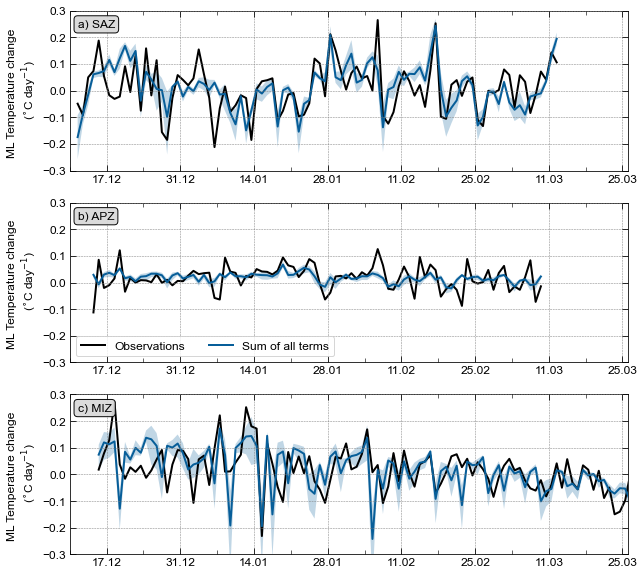

In [1373]:
fig, ax = subplots(3, figsize=[10, 10])

props = dict(zorder=10)

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i].grid(c='0.5', lw=0.5, ls='--', zorder=0)

    y = (dat['ml_t']).diff(dim='time')
    ax[i].plot(dat.time[1:], y, c='k', label='Observations')


    y = dat['dT_sum_terms_mean'][1:]
    ax[i].plot(dat.time[1:], y, c=flx_clrs[1], label='Sum of all terms')
    
    ax[i].fill_between(x=dat.time.values[1:], y1=y-dat['dT_sum_terms_min'], y2=y+dat['dT_sum_terms_max'], facecolor=flx_clrs[1], alpha=0.25)
    
    ax[i].set_ylim(-0.35, 0.35)

    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    
    ax[i].set_ylabel('ML Temperature change \n ($^{\circ}$C day$^{-1}$)')
    
ax[0].set_ylim(-0.3, 0.3)
ax[1].set_ylim(-0.3, 0.3)
ax[2].set_ylim(-0.3, 0.3)

ax[1].legend(loc=3, ncol=4)

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 0.23, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_saz_interp.time.values[1], 0.23, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_saz_interp.time.values[1], 0.23, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)

for a in ax:
    
    a.set_xlim('2018-12-10', '2019-03-26')
    
    savefig('../../figures/ml_temp_change_sum_terms.png', dpi=300, bbox_inches='tight')

In [1346]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
        
    x = dat['ml_t'].diff(dim='time')
    y = dat['dT_sum_terms_mean']

    print(np.corrcoef(x,y[1:])[0,1])

0.6190200423509058
0.3209740696633221
0.4920688545051866


### Salinity
---

In [1347]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['dS_sum_terms_mean'] = (('time'), 
                                  dat['dS_ff_mean'].values
                                + dat['dS_ent_mean'].values
                                + dat['dS_ek_adv_mean'].values 
                                + dat['dS_geo_adv'].values/3
                               )

    dat['dS_sum_terms_min']  = (('time'), dat['dS_ff_mean']    .values - dat['dS_ff_min']    .values 
                                        + dat['dS_ent_mean']   .values - dat['dS_ent_min']   .values 
                                        + dat['dS_ek_adv_mean'].values - dat['dS_ek_adv_min'].values)
    
    dat['dS_sum_terms_max']  = (('time'), dat['dS_ff_max']    .values  - dat['dS_ff_mean']    .values 
                                        + dat['dS_ent_max']   .values  - dat['dS_ent_mean']   .values 
                                        + dat['dS_ek_adv_max'].values  - dat['dS_ek_adv_mean'].values)

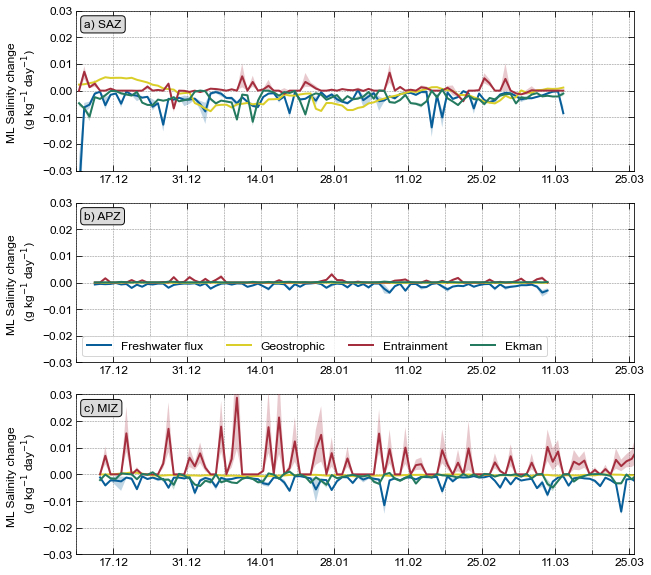

In [1348]:
fig, ax = subplots(3, figsize=[10, 10])

props = dict(zorder=10)

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i].grid(c='0.5', lw=0.5, ls='--', zorder=0, which='both')
    
    ax[i].plot(dat.time, dat['dS_ff_mean'], label='Freshwater flux', c=flx_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dS_ff_min'], y2=dat['dS_ff_max'], facecolor=flx_clrs[1], alpha=0.25, **props)
    
    ax[i].plot(dat.time, dat['dS_geo_adv']/3, label='Geostrophic', c='#dacf2a', **props)
    
    ax[i].plot(dat.time, dat['dS_ent_mean'], label='Entrainment', c=ent_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dS_ent_min'], y2=dat['dS_ent_max'], facecolor=ent_clrs[1], alpha=0.25, **props)
    
    ax[i].plot(dat.time, dat['dS_ek_adv_mean'], label='Ekman', c=ek_clrs[1], **props)
    ax[i].fill_between(x=dat.time.values, y1=dat['dS_ek_adv_min'], y2=dat['dS_ek_adv_max'], facecolor=ek_clrs[1], alpha=0.25, **props)

    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    ax[i].set_ylabel('ML Salinity change \n (g kg$^{-1}$ day$^{-1}$)')
    
ax[0].set_ylim(-0.03, 0.03)
ax[1].set_ylim(-0.03, 0.03)
ax[2].set_ylim(-0.03, 0.03)

ax[1].legend(loc=3, ncol=4)

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 0.023, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_saz_interp.time.values[1], 0.023, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_saz_interp.time.values[1], 0.023, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)

for a in ax:
    
    a.set_xlim('2018-12-10', '2019-03-26')
    
savefig('../../figures/ml_salt_change.png', dpi=300, bbox_inches='tight')

### SALINITY SUM OF ALL TERMS

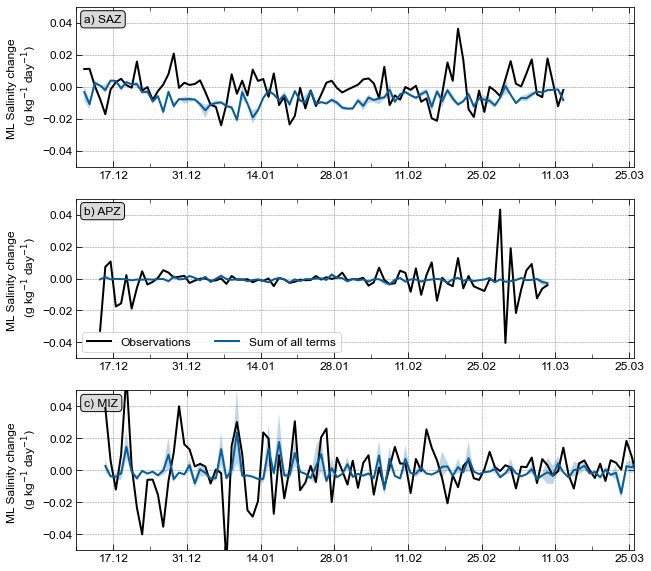

In [1354]:
fig, ax = subplots(3, figsize=[10, 10])

props = dict(zorder=10)

og_dat = [dat_saz, dat_apz, dat_miz]

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i].grid(c='0.5', lw=0.5, ls='--', zorder=0)

    y = gt.cleaning.savitzky_golay(dat['ml_s'], window_size=7, order=3).diff(dim='time')
    ax[i].plot(dat.time[1:], dat['ml_s'].diff(dim='time'), c='k', label='Observations', zorder=10)
    
    y = dat['dS_sum_terms_mean'][1:]
    ax[i].plot(dat.time[1:], y, c=flx_clrs[1], label='Sum of all terms', zorder=10)
    
    ax[i].fill_between(x=dat.time.values[1:], y1=y-dat['dS_sum_terms_min'], y2=y+dat['dS_sum_terms_max'], facecolor=flx_clrs[1], alpha=0.25, zorder=10)
    
    ax[i].set_ylim(-0.35, 0.35)

    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    ax[i].set_ylabel('ML Salinity change \n (g kg$^{-1}$ day$^{-1}$)')
    
#     ax0 = ax[i].twinx()
    
#     ax0.plot(og_dat[i].time, og_dat[i].salt[5, :], zorder=0, c='0.8', alpha=0.5, lw=1)
#     ax0.plot(dat.time, dat.ml_s, zorder=0, c='0.75', alpha=0.5, lw=1)

#     s = gt.cleaning.savitzky_golay(dat.ml_s, window_size=7, order=3)
#     ax0.plot(dat.time, s, zorder=0, c='0.5')
    
#     ax0.set_ylim(np.mean(s)-0.15, np.mean(s)+0.15)
    
#     ax0.xaxis.set_major_locator(weeks)
#     ax0.xaxis.set_minor_locator(week)
#     ax0.xaxis.set_major_formatter(yearsFmt)
    
#     ax0.yaxis.set_ticks_position('both')
#     ax0.xaxis.set_ticks_position('both')
    
    ax[i].set_zorder(ax0.get_zorder()+1)
    ax[i].patch.set_visible(False)


ax[0].set_ylim(-0.05, 0.05)
ax[1].set_ylim(-0.05, 0.05)
ax[2].set_ylim(-0.05, 0.05)

ax[1].legend(loc=3, ncol=4)

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 0.039, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_saz_interp.time.values[1], 0.039, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_saz_interp.time.values[1], 0.039, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)

for a in ax:
    
    a.set_xlim('2018-12-10', '2019-03-26')
    
savefig('../../figures/ml_salt_change_sum_terms.png', dpi=300, bbox_inches='tight')

In [1355]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):

    x = dat['ml_s'].diff(dim='time')
    y = dat['dS_sum_terms_mean']

    print(np.corrcoef(x,y[1:])[0,1])

0.03432771793861507
0.1355747606257825
0.32872145283122883


#### Calculate and plot the buoyancy content change from the terms

In [1356]:
for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):

    rho, alpha, beta = gsw.rho_alpha_beta(dat.ml_s, dat.ml_t, 0)
    dat['ml_rho']    = rho
    dat['ml_b']      = -9.81*(rho-1027)/1027
    dat['ml_beta']   = beta
    dat['ml_alpha']  = alpha

    d_t = 1025 + dat['ml_rho'] * (np.diff(np.append(0, dat['ml_t'])) * alpha).cumsum()
    d_s = 1025 + dat['ml_rho'] * (np.diff(np.append(0, dat['ml_s'])) * beta).cumsum()

    b_s = -9.81 * (d_s - 1025) / 1025 
    b_t =  9.81 * (d_t - 1025) / 1025 
    
    dat['ml_s_bc'] = dat['mld_03'] * np.diff(np.append(0, b_s)) / dt
    dat['ml_t_bc'] = dat['mld_03'] * np.diff(np.append(0, b_t)) / dt
        
        
    # buoyancy content change from the terms
    s_terms = dat['ml_s'][0] - dat['dS_sum_terms_mean'][0] + dat['dS_sum_terms_mean'].cumsum()
    t_terms = dat['ml_t'][0] - dat['dT_sum_terms_mean'][0] + dat['dT_sum_terms_mean'].cumsum()
    
    dat['s_terms'] = s_terms
    dat['t_terms'] = t_terms
    
    dat['terms_rho']  = gsw.rho(s_terms, t_terms, p=0)
    dat['terms_b']    = -9.81*(dat['terms_rho']-1027)/1027
    
    d_s =  dat['terms_rho'][0] + dat['terms_rho'] * (np.diff(np.append(s_terms[0], s_terms)) * beta).cumsum()
    d_t =  dat['terms_rho'][0] + dat['terms_rho'] * (-np.diff(np.append(t_terms[0], t_terms)) * alpha).cumsum()
    
    b_s = -9.81 * (d_s - 1025) / 1025 
    b_t =  9.81 * (d_t - 1025) / 1025 
    
    dat['s_terms_bc'] = dat['mld_03'] * np.diff(np.append(0, b_s)) / dt
    dat['t_terms_bc'] = dat['mld_03'] * np.diff(np.append(0, b_t)) / dt
    

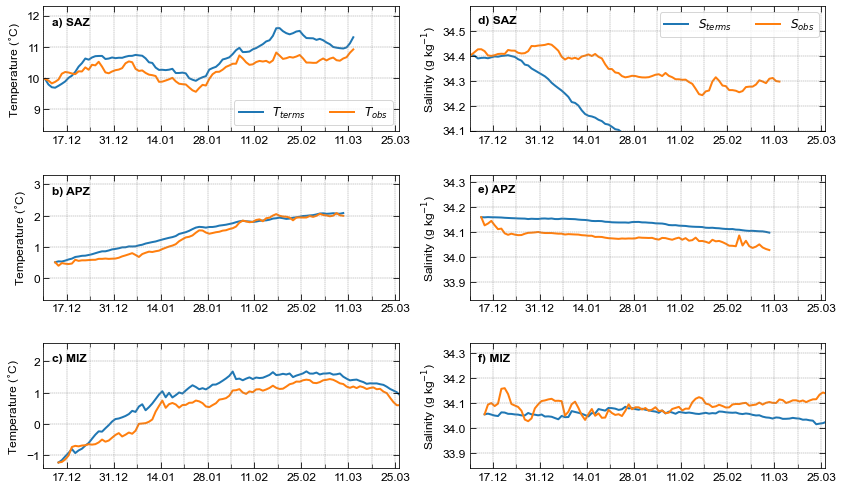

In [1372]:
fig,ax=subplots(3, 2, figsize=[14, 8.5])
fig.subplots_adjust(hspace=0.35)

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):


    ax[i, 0].plot(dat.time, dat.t_terms, label=r'$T_{terms}$')
    ax[i, 0].plot(dat.time, dat.ml_t, label=r'$T_{obs}$')

    ax[i, 1].plot(dat.time, dat.s_terms, label=r'$S_{terms}$')
    ax[i, 1].plot(dat.time, dat.ml_s, label=r'$S_{obs}$')

    ax[i, 0].set_ylim(np.mean(dat.ml_t)-2, np.mean(dat.ml_t)+2)
    ax[i, 1].set_ylim(np.mean(dat.ml_s)-0.25, np.mean(dat.ml_s)+0.25)
    
    ax[i,0].set_ylabel('Temperature ($^{\circ}$C)')
    ax[i,1].set_ylabel('Salinity (g kg$^{-1}$)')
    
    for ii in range(2):
        
        ax[i, ii].grid(c='0.5', lw=0.4, ls='--', zorder=0, which='both')
        
        ax[i, ii].xaxis.set_major_locator(weeks)
        ax[i, ii].xaxis.set_minor_locator(week)
        ax[i, ii].xaxis.set_major_formatter(yearsFmt)
    
        ax[i, ii].yaxis.set_ticks_position('both')
        ax[i, ii].xaxis.set_ticks_position('both')
        
        ax[i, ii].set_xlim('2018-12-10', '2019-03-26')

ax[0, 0].legend(loc=4, ncol=2)
ax[0, 1].legend(loc=1, ncol=2)

ax[0, 0].text(dat_saz_interp.time.values[2], 11.7, 'a) SAZ', fontsize=12, fontweight='bold')
ax[1, 0].text(dat_saz_interp.time.values[2], 2.7,  'b) APZ',  fontsize=12, fontweight='bold')
ax[2, 0].text(dat_saz_interp.time.values[2], 2.0,  'c) MIZ',  fontsize=12, fontweight='bold')

ax[0, 1].text(dat_saz_interp.time.values[2], 34.53, 'd) SAZ', fontsize=12, fontweight='bold')
ax[1, 1].text(dat_saz_interp.time.values[2], 34.26, 'e) APZ', fontsize=12, fontweight='bold')
ax[2, 1].text(dat_saz_interp.time.values[2], 34.27, 'f) MIZ', fontsize=12, fontweight='bold')

savefig('../../figures/ml_ts_sum_terms.png', dpi=300, bbox_inches='tight')

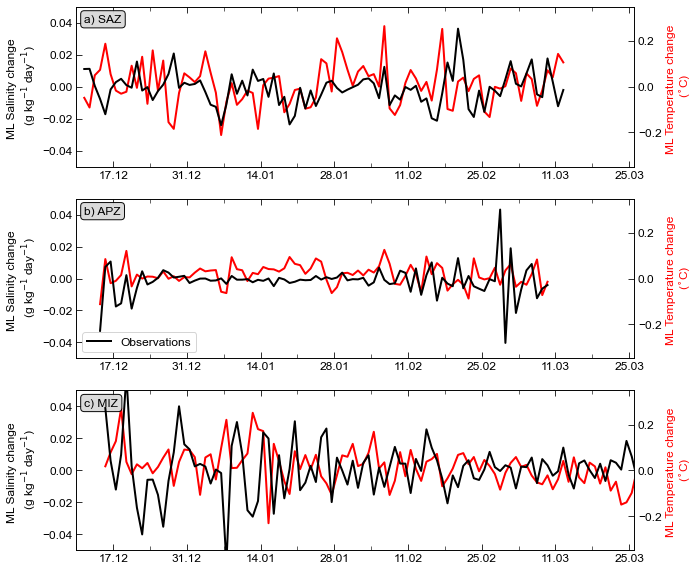

In [1383]:
fig, ax = subplots(3, figsize=[10, 10])

props = dict(zorder=10)

og_dat = [dat_saz, dat_apz, dat_miz]

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
#     ax[i].grid(c='0.5', lw=0.5, ls='--', zorder=0)

    ax[i].plot(dat.time[1:], dat['ml_s'].diff(dim='time'), c='k', label='Observations', zorder=10)    

    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_ticks_position('both')
    
    ax[i].set_ylabel('ML Salinity change \n (g kg$^{-1}$ day$^{-1}$)')
    
    ax0 = ax[i].twinx()
    
    ax0.plot(dat.time[1:], dat['ml_t'].diff(dim='time'), c='r', label='Temp', zorder=10)    
    ax0.set_ylim(-0.35, 0.35)
    
    ax0.xaxis.set_major_locator(weeks)
    ax0.xaxis.set_minor_locator(week)
    ax0.xaxis.set_major_formatter(yearsFmt)

    ax0.set_ylabel('ML Temperature change \n ($^{\circ}$C)', c='r')
    
    ax[i].set_zorder(ax0.get_zorder()+1)
    ax[i].patch.set_visible(False)


ax[0].set_ylim(-0.05, 0.05)
ax[1].set_ylim(-0.05, 0.05)
ax[2].set_ylim(-0.05, 0.05)

ax[1].legend(loc=3, ncol=4)

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

ax[0].text(dat_saz_interp.time.values[1], 0.039, 'a) SAZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1].text(dat_saz_interp.time.values[1], 0.039, 'b) APZ', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2].text(dat_saz_interp.time.values[1], 0.039, 'c) MIZ', fontsize=12, verticalalignment='bottom', bbox=props)

for a in ax:
    
    a.set_xlim('2018-12-10', '2019-03-26')
    
# savefig('../../figures/ml_salt_change_sum_terms.png', dpi=300, bbox_inches='tight')

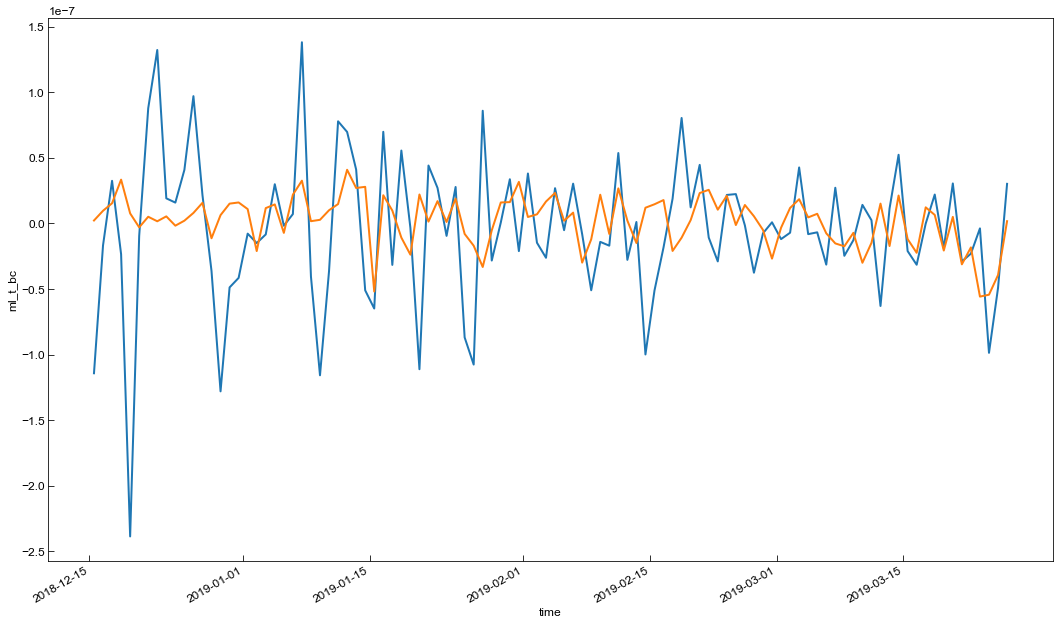

In [1385]:
dat['ml_s_bc'][1:].plot()
dat['ml_t_bc'][1:].plot()